# **Data Description**
The Data consists different properties and the system infections details which was generated by threat reports collected by system's antivirus software.

Target is the ground truth and indicates that Malware was detected on the machine.

Dataset Features

* 'MachineID' : Unique Identifier for Each Machine
* 'ProductName': Name of the Installed Antivirus Product
* 'EngineVersion': Version of the Antivirus Engine
* 'AppVersion' : Version of the Antivirus Application
* 'SignatureVersion': Version of the Antivirus Signatures
* 'IsBetaUser': Whether the User is on a Beta Version
* 'RealTimeProtectionState': Status of Real-Time Protection
* 'IsPassiveModeEnabled' : Whether Passive Mode is Enabled
* 'AntivirusConfigID' : Identifier for Antivirus Configuration
* 'NumAntivirusProductsInstalled' : Number of Installed Antivirus Products
* 'NumAntivirusProductsEnabled' : Number of Enabled Antivirus Products
* 'HasTpm' : Whether the Machine has a Trusted Platform Module (TPM)
* 'CountryID': Identifier for the Country of the Machine
* 'CityID' : Identifier for the City of the Machine
* 'GeoRegionID' : Identifier for the Machine's Organization or Industry
* 'LocaleEnglishNameID' : English Locale Name ID of the Current User
* 'PlatformType' : Platform Type Derived from OS and Processor Information
* 'Processor' : Processor Architecture of the Installed OS
* 'OSVersion' : Operating System Version
* 'OSBuildNumber' : OS Build Number
* 'OSProductSuite' : Product Suite Mask for the Operating System
* 'OsPlatformSubRelease' : Sub-release of the Operating System
* 'OSBuildLab' : Detailed OS Build Information
* 'SKUEditionName' : SKU Edition of the Operating System
* 'IsSystemProtected' : Whether the System has Active Protection
* 'AutoSampleSubmissionEnabled' : Auto Sample Submission Setting
* 'SMode' : Whether the Device is Running in S Mode
* 'IEVersionID' : Internet Explorer Version Identifier
* 'FirewallEnabled' : Whether Windows Firewall is Enabled
* 'EnableLUA'
* 'MDC2FormFactor'
* 'DeviceFamily'
* 'OEMNameID'
* 'OEMModelID'
* 'ProcessorCoreCount'
* 'ProcessorManufacturerID'
* 'ProcessorModelID'
* 'PrimaryDiskCapacityMB'
* 'PrimaryDiskType'
* 'SystemVolumeCapacityMB'
* 'HasOpticalDiskDrive'
* 'TotalPhysicalRAMMB'
* 'ChassisType'
* 'PrimaryDisplayDiagonalInches'
* 'PrimaryDisplayResolutionHorizontal'
* 'PrimaryDisplayResolutionVertical'
* 'PowerPlatformRole'
* 'InternalBatteryNumberOfCharges'
* 'NumericOSVersion'
* 'OSArchitecture'
* 'OSBranch'
* 'OSBuildNumberOnly'
* 'OSBuildRevisionOnly'
* 'OSEdition'
* 'OSSkuFriendlyName'
* 'OSInstallType'
* 'OSInstallLanguageID'
* 'OSUILocaleID'
* 'AutoUpdateOptionsName'
* 'IsPortableOS'
* 'OSGenuineState'
* 'LicenseActivationChannel'
* 'IsFlightsDisabled'
* 'FlightRing'
* 'FirmwareManufacturerID'
* 'FirmwareVersionID
* 'IsSecureBootEnabled'
* 'IsVirtualDevice'
* 'IsTouchEnabled'
* 'IsPenCapable'
* 'IsAlwaysOnAlwaysConnectedCapable'
* 'IsGamer'
* 'RegionIdentifier'
* 'DateAS'
* 'DateOS'

# **Importing Packages**

In [1]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np
from collections import Counter
import math

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Libaries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest,mutual_info_classif,RFE

# Model Selection and Metrics
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Machine learning Libaries
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Ignore warnings   
import warnings
warnings.filterwarnings('ignore')

# Cleaning Garbage
import gc
gc.collect()

0

# **Loading Dataset**

In [2]:
train_data = pd.read_csv("/kaggle/input/System-Threat-Forecaster/train.csv")
test_data = pd.read_csv("/kaggle/input/System-Threat-Forecaster/test.csv")

In [3]:
# Increase the number of columns displayed
pd.set_option('display.max_columns',None)
pd.set_option('display.width', None)

In [4]:
print("Dataset Shape",train_data.shape)

Dataset Shape (100000, 76)


In [5]:
train_data.head()

MachineID   ProductName EngineVersion  \
0  f541bae429089117c4aac39c90dd3416  win8defender   1.1.15200.1   
1  dc2b14d9ce3a0ce4050bb640190f2ca5  win8defender   1.1.15100.1   
2  fd20c5f010e9c5f91ad1c6b3e0da68a0  win8defender   1.1.15200.1   
3  38711eae85eb77a72ec5dfdf27eb2a76  win8defender   1.1.15200.1   
4  32607c9a543a9214e2c7e45800ed4849  win8defender   1.1.15200.1   

         AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
0   4.18.1807.18075     1.275.1003.0           0                      7.0   
1   4.18.1807.18075     1.273.1465.0           0                      7.0   
2   4.18.1807.18075     1.275.1546.0           0                      7.0   
3  4.12.17007.18011     1.275.1141.0           0                      7.0   
4    4.13.17134.228     1.275.1283.0           0                      7.0   

   IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
0                     0            53447.0                            1.0   
1                     0            53447.0                            1.0   
2                     0            53447.0                            1.0   
3                     0            46413.0                            2.0   
4                     0            40466.0                            2.0   

   NumAntivirusProductsEnabled  HasTpm  CountryID    CityID  GeoRegionID  \
0                          1.0       1         51  120232.0         98.0   
1                          1.0       1        141  112854.0        167.0   
2                          1.0       1         51   41759.0         98.0   
3                          1.0       1         68   19507.0        276.0   
4                          1.0       1         43  117801.0         53.0   

   LocaleEnglishNameID PlatformType Processor OSVersion  OSBuildNumber  \
0                  103    windows10       x86  10.0.0.0          14393   
1                  227    windows10       x64  10.0.0.0          17134   
2                  103    windows10       x64  10.0.0.0          17134   
3                   74    windows10       x64  10.0.0.0          15063   
4                   42    windows10       x86  10.0.0.0          17134   

   OSProductSuite OsPlatformSubRelease  \
0             768                  rs1   
1             256                  rs4   
2             768                  rs4   
3             768                  rs2   
4             256                  rs4   

                                    OSBuildLab SKUEditionName  \
0  14393.2214.x86fre.rs1_release_1.180402-1758           Home   
1     17134.1.amd64fre.rs4_release.180410-1804            Pro   
2     17134.1.amd64fre.rs4_release.180410-1804           Home   
3     15063.0.amd64fre.rs2_release.170317-1834           Home   
4       17134.1.x86fre.rs4_release.180410-1804            Pro   

   IsSystemProtected  AutoSampleSubmissionEnabled  SMode  IEVersionID  \
0                1.0                            0    0.0         98.0   
1                1.0                            0    0.0        137.0   
2                1.0                            0    0.0        137.0   
3                1.0                            0    0.0        108.0   
4                1.0                            0    0.0        137.0   

   FirewallEnabled  EnableLUA MDC2FormFactor     DeviceFamily  OEMNameID  \
0              1.0        1.0    SmallTablet  Windows.Desktop      561.0   
1              1.0        1.0       AllInOne  Windows.Desktop     2668.0   
2              1.0        1.0        Desktop  Windows.Desktop     3035.0   
3              1.0        1.0       Notebook  Windows.Desktop     2102.0   
4              1.0        1.0        Desktop  Windows.Desktop     2668.0   

   OEMModelID  ProcessorCoreCount  ProcessorManufacturerID  ProcessorModelID  \
0    330367.0                 4.0                      5.0            1850.0   
1     25212.0                 4.0                      5.0            2407.0   
2    263666.0  

In [6]:
train_data.tail()

MachineID   ProductName EngineVersion  \
99995  a378b2196a7a1d8ee0d4f989ee46730e  win8defender   1.1.15200.1   
99996  7f4433ca05d24b9bbdd3932f8b05e61f  win8defender   1.1.15100.1   
99997  d6852dfff534e03d5ddfd3c7875ab072  win8defender   1.1.15200.1   
99998  70a8dc682128c9ff78a3de5aea9dac74  win8defender   1.1.14901.4   
99999  ad9c385b53f2ca788933a39603b84eda  win8defender   1.1.15000.2   

             AppVersion SignatureVersion  IsBetaUser  RealTimeProtectionState  \
99995   4.18.1807.18075     1.275.1582.0           0                      7.0   
99996   4.18.1806.18062     1.273.1156.0           0                      7.0   
99997   4.18.1807.18075      1.275.209.0           0                      7.0   
99998  4.16.17656.18052      1.269.641.0           0                      7.0   
99999   4.18.1806.18062     1.271.1003.0           0                      7.0   

       IsPassiveModeEnabled  AntivirusConfigID  NumAntivirusProductsInstalled  \
99995                     0            68585.0                            2.0   
99996                     0            11280.0                            2.0   
99997                     0            53447.0                            1.0   
99998                     0            53447.0                            1.0   
99999                     0             7945.0                            2.0   

       NumAntivirusProductsEnabled  HasTpm  CountryID    CityID  GeoRegionID  \
99995                          1.0       1         43   71228.0         53.0   
99996                          1.0       1        137  137066.0        160.0   
99997                          1.0       1        142   74924.0        157.0   
99998                          1.0       1        139   87570.0        158.0   
99999                          1.0       1        100    4110.0        224.0   

       LocaleEnglishNameID PlatformType Processor OSVersion  OSBuildNumber  \
99995                   42    windows10       x64  10.0.0.0          16299   
99996                   74    windows10       x64  10.0.0.0          17134   
99997                   68    windows10       x64  10.0.0.0          16299   
99998                   74    windows10       x64  10.0.0.0          17134   
99999                   75    windows10       x64  10.0.0.0          17134   

       OSProductSuite OsPlatformSubRelease  \
99995             256                  rs3   
99996             256                  rs4   
99997             256                  rs3   
99998             256                  rs4   
99999             768                  rs4   

                                              OSBuildLab SKUEditionName  \
99995  16299.431.amd64fre.rs3_release_svc_escrow.1805...            Pro   
99996           17134.1.amd64fre.rs4_release.180410-1804            Pro   
99997          16299.15.amd64fre.rs3_release.170928-1534            Pro   
99998           17134.1.amd64fre.rs4_release.180410-1804            Pro   
99999           17134.1.amd64fre.rs4_release.180410-1804           Home   

       IsSystemProtected  AutoSampleSubmissionEnabled  SMode  IEVersionID  \
99995                1.0                            0    0.0        117.0   
99996                1.0                            0    0.0        137.0   
99997                1.0                            0    0.0        111.0   
99998                1.0                            0    0.0        137.0   
99999                1.0                            0    0.0        137.0   

       FirewallEnabled  EnableLUA MDC2FormFactor     DeviceFamily  OEMNameID  \
99995              1.0        1.0        Desktop  Windows.Desktop     4909.0   
99996              1.0        1.0       Notebook  Windows.Desktop     1443.0   
99997              1.0        1.0        Desktop  Windows.Desktop     2102.0   
99998              1.0        1.0       Notebook  Windows.Desktop     3150.0   
99999              1.0        1.0       Notebook  Windows.Desktop     1443.0   

       

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 76 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   MachineID                           100000 non-null  object 
 1   ProductName                         100000 non-null  object 
 2   EngineVersion                       100000 non-null  object 
 3   AppVersion                          100000 non-null  object 
 4   SignatureVersion                    100000 non-null  object 
 5   IsBetaUser                          100000 non-null  int64  
 6   RealTimeProtectionState             99934 non-null   float64
 7   IsPassiveModeEnabled                100000 non-null  int64  
 8   AntivirusConfigID                   99924 non-null   float64
 9   NumAntivirusProductsInstalled       99924 non-null   float64
 10  NumAntivirusProductsEnabled         99924 non-null   float64
 11  HasTpm                     

In [8]:
# Duplicate Row Count
duplicate_rows_df = train_data[train_data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (165, 76)


In [9]:
# # Droping Duplicates 
train_data = train_data.drop_duplicates()

In [10]:
stats = []
for col in train_data.columns:
    stats.append((col, train_data[col].nunique(), train_data[col].isnull().sum() * 100 / train_data.shape[0],
                  train_data[col].value_counts(normalize=True, dropna=False).values[0] * 100, train_data[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of imbalance in the features', 'type'])

In [11]:
stats_df[['Feature', 'Percentage of missing values']][stats_df['Percentage of missing values'] > 0].sort_values(by='Percentage of missing values', ascending=False).T

26       13        71                72  \
Feature                          SMode   CityID   IsGamer  RegionIdentifier   
Percentage of missing values  0.982621  0.62403  0.559924          0.559924   

                                                          47  \
Feature                       InternalBatteryNumberOfCharges   
Percentage of missing values                        0.515851   

                                                  64                 65  \
Feature                       FirmwareManufacturerID  FirmwareVersionID   
Percentage of missing values                0.376621           0.334552   

                                             62          33         32  \
Feature                       IsFlightsDisabled  OEMModelID  OEMNameID   
Percentage of missing values           0.326539    0.228377    0.21235   

                                           28                  41  \
Feature                       FirewallEnabled  TotalPhysicalRAMMB   
Percentage of missing values         0.166274             0.15125   

                                                            70  \
Feature                       IsAlwaysOnAlwaysConnectedCapable   
Percentage of missing values                          0.134221   

                                               56                      39  \
Feature                       OSInstallLanguageID  SystemVolumeCapacityMB   
Percentage of missing values             0.113187                0.110182   

                                                 37           27  \
Feature                       PrimaryDiskCapacityMB  IEVersionID   
Percentage of missing values               0.110182     0.107177   

                                            36                       35  \
Feature                       ProcessorModelID  ProcessorManufacturerID   
Percentage of missing values           0.08514                  0.08514   

                                              34                 8   \
Feature                       ProcessorCoreCount  AntivirusConfigID   
Percentage of missing values             0.08514           0.076126   

                                             24                           10  \
Feature                       IsSystemProtected  NumAntivirusProductsEnabled   
Percentage of missing values           0.076126                     0.076126   

                                                         9   \
Feature                       NumAntivirusProductsInstalled   
Percentage of missing values                       0.076126   

                                                        43  \
Feature                       PrimaryDisplayDiagonalInches   
Percentage of missing values                      0.072119   

                                                              44  \
Feature                       PrimaryDisplayResolutionHorizontal   
Percentage of missing values                            0.072119   

                                                            45  \
Feature                       PrimaryDisplayResolutionVertical   
Percentage of missing values                          0.072119   

                                                   6        74  \
Feature                       RealTimeProtectionState   DateOS   
Percentage of missing values                 0.066109  0.02404   

                                           38               67         29  \
Feature                       PrimaryDiskType  IsVirtualDevice  EnableLUA   
Percentage of missing values         0.023038         0.020033   0.019031   

                                       42  
Feature                       ChassisType  
Percentage of missing values     0.002003

In [12]:
stats_df[['Feature', 'Unique_values']][stats_df['Unique_values'] ==1]

Feature  Unique_values
5                    IsBetaUser              1
25  AutoSampleSubmissionEnabled              1
62            IsFlightsDisabled              1

In [13]:
constant_columns = train_data.columns[train_data.nunique() == 1].tolist()
constant_columns

['IsBetaUser', 'AutoSampleSubmissionEnabled', 'IsFlightsDisabled']

In [14]:
# Redundant columns Removal
train_data = train_data.drop(columns=constant_columns)
test_data = test_data.drop(columns=constant_columns)

In [15]:
# Droping 'MachineID' as it is the ID corresponds to a machine.
train_data = train_data.drop(columns=['MachineID'])
test_data = test_data.drop(columns=['MachineID'])

In [16]:
# missing values count
missing_values=train_data.isnull().sum()
missing_values[missing_values>0]

RealTimeProtectionState                66
AntivirusConfigID                      76
NumAntivirusProductsInstalled          76
NumAntivirusProductsEnabled            76
CityID                                623
IsSystemProtected                      76
SMode                                 981
IEVersionID                           107
FirewallEnabled                       166
EnableLUA                              19
OEMNameID                             212
OEMModelID                            228
ProcessorCoreCount                     85
ProcessorManufacturerID                85
ProcessorModelID                       85
PrimaryDiskCapacityMB                 110
PrimaryDiskType                        23
SystemVolumeCapacityMB                110
TotalPhysicalRAMMB                    151
ChassisType                             2
PrimaryDisplayDiagonalInches           72
PrimaryDisplayResolutionHorizontal     72
PrimaryDisplayResolutionVertical       72
InternalBatteryNumberOfCharges    

In [17]:
# Drop the target for feature classification
features = train_data.drop(columns=["target"])

# Categorical features
categorical_features = features.select_dtypes(include=['object','category']).columns.tolist()

# All Numerical features
all_numerical_features = features.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Binary features
numerical_features=[]
binary_features=[]
for feature in all_numerical_features:
    if train_data[feature].nunique()!=2:
       numerical_features=numerical_features+[feature]
    else:
        binary_features=binary_features+[feature]

# **Exploratory Data Analysis**

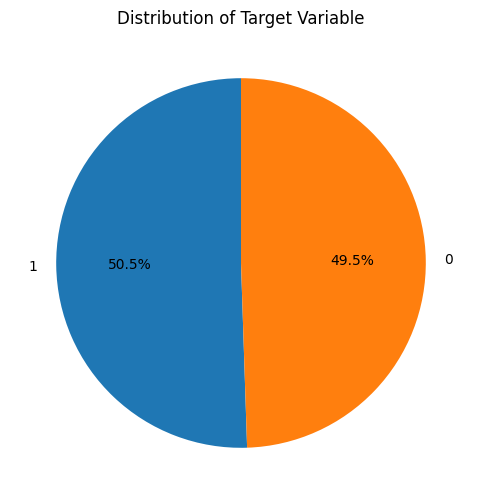

In [18]:
# Count the occurrences of each class in the target variable
target_counts = train_data['target'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Target Variable')
plt.show()

## Above Pie Chart shows that target distribution is balanced.

In [19]:
versional_features=['EngineVersion', 'AppVersion', 'SignatureVersion', 'OSVersion', 'NumericOSVersion']

In [20]:
for col in versional_features:
    print(f"No of values in {col}: {train_data[col].nunique()}")

No of values in EngineVersion: 37
No of values in AppVersion: 69
No of values in SignatureVersion: 2735
No of values in OSVersion: 7
No of values in NumericOSVersion: 221


In [21]:
for col in versional_features:
    print(f"Most frequent value in {col}: {train_data[col].mode()[0]}")

Most frequent value in EngineVersion: 1.1.15200.1
Most frequent value in AppVersion: 4.18.1807.18075
Most frequent value in SignatureVersion: 1.273.1420.0
Most frequent value in OSVersion: 10.0.0.0
Most frequent value in NumericOSVersion: 10.0.17134.228


## Feature Engineering Version based features to Numerical

In [22]:
data=train_data.loc[:, versional_features]
print("Train Before")
data.head()

Train Before


EngineVersion        AppVersion SignatureVersion OSVersion NumericOSVersion
0   1.1.15200.1   4.18.1807.18075     1.275.1003.0  10.0.0.0  10.0.14393.2214
1   1.1.15100.1   4.18.1807.18075     1.273.1465.0  10.0.0.0   10.0.17134.228
2   1.1.15200.1   4.18.1807.18075     1.275.1546.0  10.0.0.0   10.0.17134.285
3   1.1.15200.1  4.12.17007.18011     1.275.1141.0  10.0.0.0   10.0.15063.850
4   1.1.15200.1    4.13.17134.228     1.275.1283.0  10.0.0.0   10.0.17134.285

In [23]:
# Function to convert version numbers safely
def version_to_int(version):
    return int(version.replace('.', '')) if isinstance(version, str) else 0

In [24]:
# Convert each version column
for col in versional_features:
    train_data[col] = train_data[col].apply(version_to_int)

convert_data = train_data.loc[:,versional_features]
print("Train After")
convert_data.head()

Train After


EngineVersion     AppVersion  SignatureVersion  OSVersion  NumericOSVersion
0       11152001   418180718075         127510030      10000      100143932214
1       11151001   418180718075         127314650      10000       10017134228
2       11152001   418180718075         127515460      10000       10017134285
3       11152001  4121700718011         127511410      10000       10015063850
4       11152001    41317134228         127512830      10000       10017134285

In [25]:
data=test_data.loc[:, versional_features]
print("Test Before")
data.head()

Test Before


EngineVersion        AppVersion SignatureVersion OSVersion NumericOSVersion
0   1.1.15100.1   4.18.1807.18075     1.273.1276.0  10.0.0.0   10.0.17134.165
1   1.1.15100.1        4.10.209.0      1.273.371.0   6.3.0.0   10.0.14393.321
2   1.1.15200.1   4.18.1807.18075      1.275.263.0  10.0.0.0   10.0.16299.431
3   1.1.15300.6   4.18.1807.18075       1.277.58.0  10.0.0.0   10.0.16299.431
4   1.1.14800.3  4.14.17639.18041      1.267.898.0  10.0.0.0   10.0.17134.112

In [26]:
# Convert each version column
for col in versional_features:
    test_data[col] = test_data[col].apply(version_to_int)

convert_data = test_data.loc[:, versional_features]
print("Test After")
convert_data.head()

Test After


EngineVersion     AppVersion  SignatureVersion  OSVersion  NumericOSVersion
0       11151001   418180718075         127312760      10000       10017134165
1       11151001        4102090          12733710       6300       10014393321
2       11152001   418180718075          12752630      10000       10016299431
3       11153006   418180718075           1277580      10000       10016299431
4       11148003  4141763918041          12678980      10000       10017134112

In [27]:
categorical_features=[feature for feature in categorical_features if feature not in versional_features]
numerical_features=numerical_features+versional_features

# Numerical features EDA

In [28]:
print("No of Numerical features:",len(numerical_features))
print()
numerical_features.sort()
print("Numerical features:",numerical_features)

No of Numerical features: 36

Numerical features: ['AntivirusConfigID', 'AppVersion', 'CityID', 'CountryID', 'EnableLUA', 'EngineVersion', 'FirmwareManufacturerID', 'FirmwareVersionID', 'GeoRegionID', 'IEVersionID', 'InternalBatteryNumberOfCharges', 'LocaleEnglishNameID', 'NumAntivirusProductsEnabled', 'NumAntivirusProductsInstalled', 'NumericOSVersion', 'OEMModelID', 'OEMNameID', 'OSBuildNumber', 'OSBuildNumberOnly', 'OSBuildRevisionOnly', 'OSInstallLanguageID', 'OSProductSuite', 'OSUILocaleID', 'OSVersion', 'PrimaryDiskCapacityMB', 'PrimaryDisplayDiagonalInches', 'PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical', 'ProcessorCoreCount', 'ProcessorManufacturerID', 'ProcessorModelID', 'RealTimeProtectionState', 'RegionIdentifier', 'SignatureVersion', 'SystemVolumeCapacityMB', 'TotalPhysicalRAMMB']


In [29]:
# Missing values count and Understanding the features
missing_values=train_data[numerical_features].isnull().sum()
missing_values[missing_values>0].tolist
missing_values_features = missing_values[missing_values > 0].index.tolist()
train_data[missing_values_features].head()

AntivirusConfigID    CityID  EnableLUA  FirmwareManufacturerID  \
0            53447.0  120232.0        1.0                   513.0   
1            53447.0  112854.0        1.0                   628.0   
2            53447.0   41759.0        1.0                   142.0   
3            46413.0   19507.0        1.0                   554.0   
4            40466.0  117801.0        1.0                   628.0   

   FirmwareVersionID  IEVersionID  InternalBatteryNumberOfCharges  \
0            21964.0         98.0                    1.420000e+02   
1            44548.0        137.0                    4.294967e+09   
2             9414.0        137.0                    4.294967e+09   
3            33060.0        108.0                    0.000000e+00   
4            13224.0        137.0                    4.294967e+09   

   NumAntivirusProductsEnabled  NumAntivirusProductsInstalled  OEMModelID  \
0                          1.0                            1.0    330367.0   
1                          1.0                            1.0     25212.0   
2                          1.0                            1.0    263666.0   
3                          1.0                            2.0    242491.0   
4                          1.0                            2.0    257309.0   

   OEMNameID  OSInstallLanguageID  PrimaryDiskCapacityMB  \
0      561.0                  5.0                15028.0   
1     2668.0                  9.0               953869.0   
2     3035.0                  5.0               228936.0   
3     2102.0                  7.0              1907729.0   
4     2668.0                 37.0               305245.0   

   PrimaryDisplayDiagonalInches  PrimaryDisplayResolutionHorizontal  \
0                           8.0                               800.0   
1                          19.4                              1600.0   
2                          24.0                              1920.0   
3                          15.5                              1366.0   
4                          20.0                              1600.0   

   PrimaryDisplayResolutionVertical  ProcessorCoreCount  \
0                            1280.0                 4.0   
1                             900.0                 4.0   
2                            1080.0                 4.0   
3                             768.0                 4.0   
4                             900.0                 2.0   

   ProcessorManufacturerID  ProcessorModelID  RealTimeProtectionState  \
0                      5.0            1850.0                      7.0   
1                      5.0            2407.0                      7.0   
2                      5.0            2719.0                      7.0   
3                      5.0            3410.0                      7.0   
4                      5.0            4322.0                      7.0   

   RegionIdentifier  SystemVolumeCapacityMB  TotalPhysicalRAMMB  
0               6.0                 14348.0              1024.0  
1              10.0                952592.0              4096.0  
2               6.0                228321.0              8192.0  
3              12.0               1890776.0              8192.0  
4               7.0                 52804.0              2048.0

In [30]:
train_data['EnableLUA'].value_counts()
train_data['EnableLUA'] = train_data['EnableLUA'].replace(48.0, np.nan)
test_data['EnableLUA'] = test_data['EnableLUA'].replace(48.0, np.nan)
numerical_features=[feature for feature in numerical_features if feature not in ['EnableLUA']]
binary_features=binary_features+['EnableLUA']

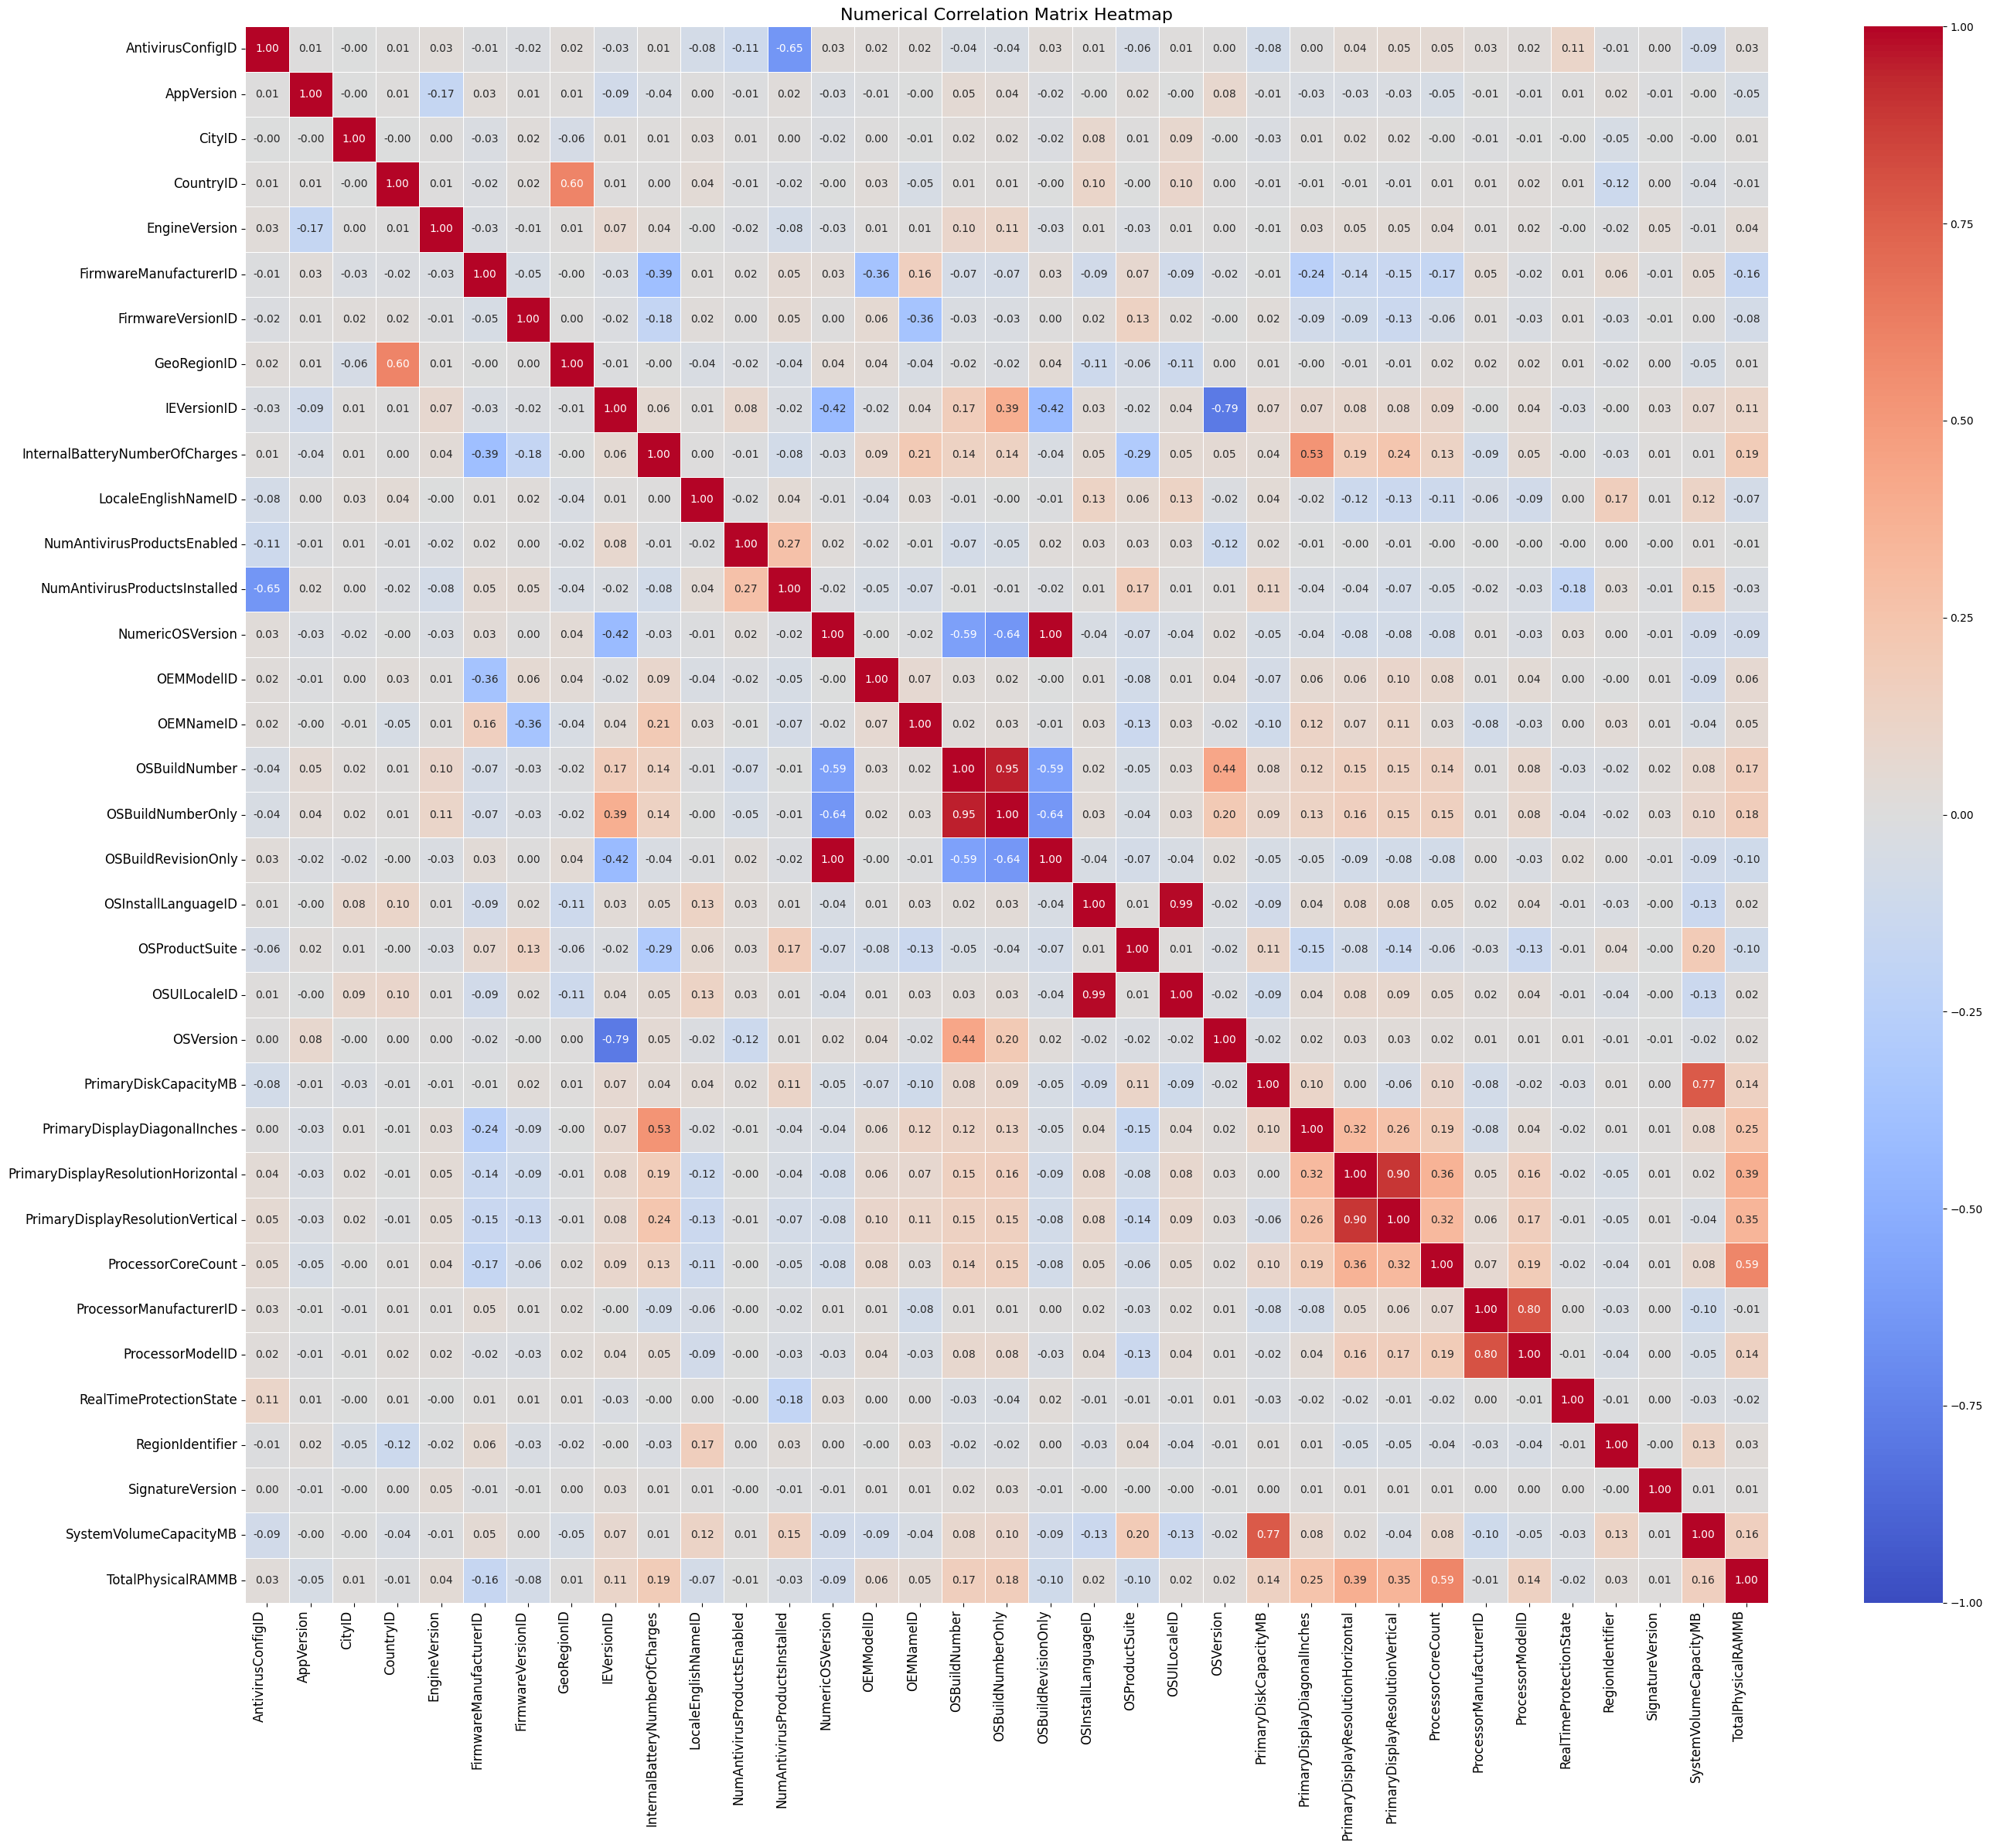

In [31]:
# Calculate correlation for numerical features
numerical_correlation_matrix = train_data[numerical_features].corr()

# Set the size of the figure
plt.figure(figsize=(28, 24))

# Create a mask to show only one triangle (optional)
mask = np.triu(np.ones_like(numerical_correlation_matrix, dtype=bool))

# Create a heatmap
sns.heatmap(numerical_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, 
            xticklabels=numerical_correlation_matrix.columns, yticklabels=numerical_correlation_matrix.columns, 
            annot_kws={'size': 10}, vmin=-1, vmax=1, center=0
           # mask=mask,
           )

# Rotate the tick labels for better readability
plt.xticks(rotation=90, fontsize=12, ha='right')
plt.yticks(rotation=0, fontsize=12)

# Adjust layout to ensure everything fits nicely
plt.title('Numerical Correlation Matrix Heatmap', fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()

In [32]:
high_correlated_columns = set()

for i in range(len(numerical_correlation_matrix.columns)):
    for j in range(i):
        if abs(numerical_correlation_matrix.iloc[i, j]) >= 0.90:
            high_correlated_columns.add(numerical_correlation_matrix.columns[i])
            print((numerical_correlation_matrix.columns[i], numerical_correlation_matrix.columns[j], numerical_correlation_matrix.iloc[i, j]))

print("Highly Correlated Columns:", list(high_correlated_columns))

('OSBuildNumberOnly', 'OSBuildNumber', 0.9476128730154929)
('OSBuildRevisionOnly', 'NumericOSVersion', 0.9961805609170934)
('OSUILocaleID', 'OSInstallLanguageID', 0.98808238200902)
Highly Correlated Columns: ['OSUILocaleID', 'OSBuildRevisionOnly', 'OSBuildNumberOnly']


In [33]:
# Droping high correlation for numerical features
train_data = train_data.drop(columns=high_correlated_columns)
test_data = test_data.drop(columns=high_correlated_columns)
numerical_features = [feature for feature in numerical_features if feature not in high_correlated_columns]

In [34]:
screen_size_based_numerical_features=['PrimaryDisplayDiagonalInches','PrimaryDisplayResolutionHorizontal', 'PrimaryDisplayResolutionVertical']

geographical_features =['CountryID', 'CityID', 'GeoRegionID']

storage_based_numerical_featues=['PrimaryDiskCapacityMB', 'SystemVolumeCapacityMB','InternalBatteryNumberOfCharges']

total_RAM=['TotalPhysicalRAMMB']

IE_ID=['IEVersionID']

OS_features=['OSBuildNumber','OSBuildRevisionOnly']

ID_numerical_features=['AntivirusConfigID', 'LocaleEnglishNameID', 'OSProductSuite','OEMNameID', 'OEMModelID', 'ProcessorManufacturerID', 'ProcessorModelID', 'OSInstallLanguageID', 'FirmwareManufacturerID', 'FirmwareVersionID','RegionIdentifier']

versional_features=[feature for feature in numerical_features if feature in versional_features]

non_nominal_numerical_features=screen_size_based_numerical_features+geographical_features+storage_based_numerical_featues+ID_numerical_features+versional_features+total_RAM+IE_ID+OS_features

nominal_numerical_features=[feature for feature in numerical_features if feature not in non_nominal_numerical_features]

In [35]:
# Count occurrences of unique combinations
combination_counts = train_data[screen_size_based_numerical_features].value_counts().reset_index(name='Count')

# Create a new column combining diagonal size and resolution
combination_counts["Screen & Resolution"] = combination_counts.apply(
    lambda row: f"{row['PrimaryDisplayDiagonalInches']} inches | {row['PrimaryDisplayResolutionHorizontal']}x{row['PrimaryDisplayResolutionVertical']}", axis=1
)

# Keep only relevant columns
combination_counts = combination_counts[["Screen & Resolution", "Count"]]

# Display the first few rows
print("\nScreen Size & Resolution Counts:\n")
print(combination_counts.head(10))  # Show top 10 values


Screen Size & Resolution Counts:

           Screen & Resolution  Count
0   15.5 inches | 1366.0x768.0  26254
1   13.9 inches | 1366.0x768.0   9078
2  15.5 inches | 1920.0x1080.0   7365
3   14.0 inches | 1366.0x768.0   4899
4   11.6 inches | 1366.0x768.0   3223
5  21.5 inches | 1920.0x1080.0   2868
6   18.5 inches | 1366.0x768.0   2102
7  23.0 inches | 1920.0x1080.0   1823
8   13.2 inches | 1366.0x768.0   1413
9   15.6 inches | 1366.0x768.0   1357


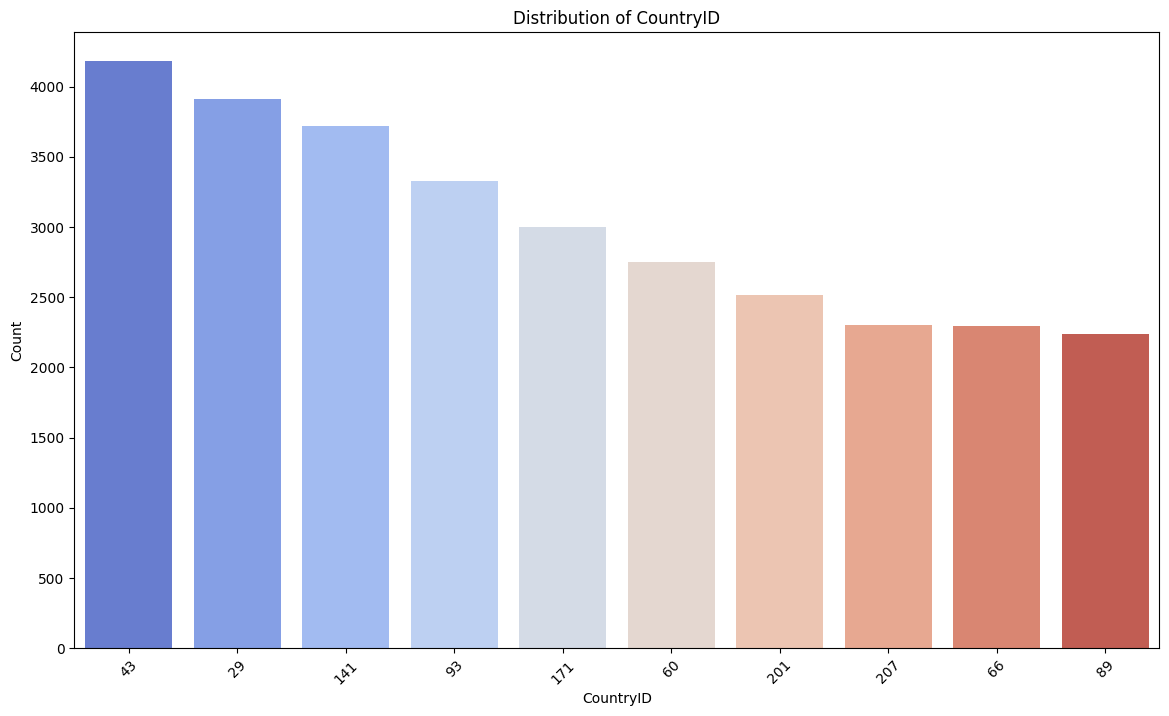

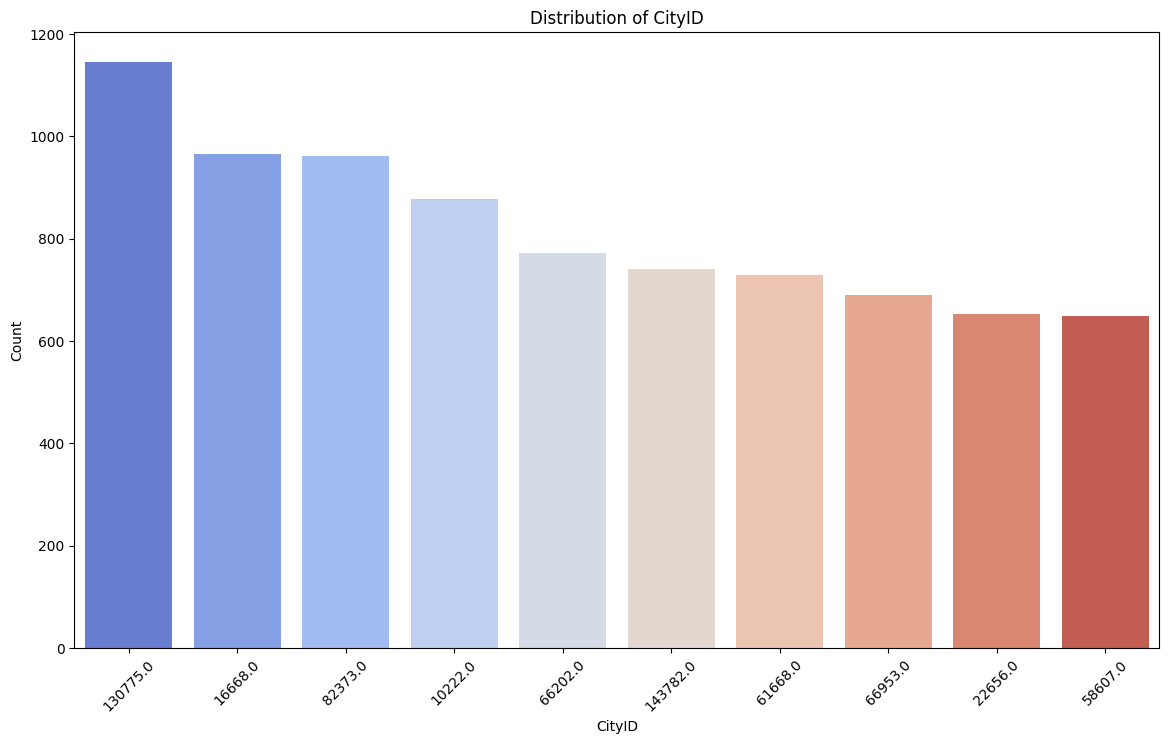

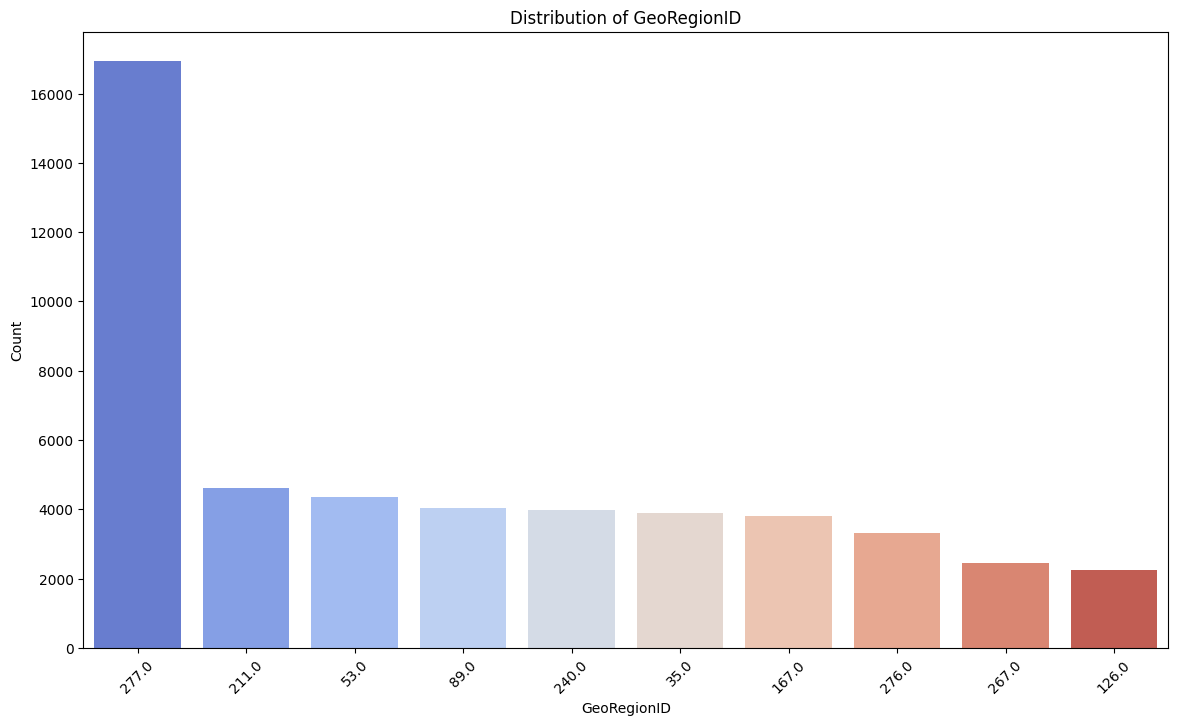

In [36]:
# Plot count plot for each categorical feature
for feature in geographical_features:
    plt.figure(figsize=(14, 8))
    sns.countplot(x=train_data[feature], order=train_data[feature].value_counts().index[:10], palette="coolwarm")
    
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    
    plt.show()

In [37]:
train_data[storage_based_numerical_featues].describe(include='all').round(2)

PrimaryDiskCapacityMB  SystemVolumeCapacityMB  \
count               99725.00                99725.00   
mean               515840.90               381974.96   
std                352577.88               324631.30   
min                 12288.00                10880.00   
25%                244198.00               120841.00   
50%                476940.00               256649.00   
75%                953869.00               476102.00   
max               7630885.00              6630319.00   

       InternalBatteryNumberOfCharges  
count                    9.932000e+04  
mean                     1.118024e+09  
std                      1.884657e+09  
min                      0.000000e+00  
25%                      0.000000e+00  
50%                      0.000000e+00  
75%                      4.294967e+09  
max                      4.294967e+09

In [38]:
for feature in storage_based_numerical_featues:
    print("No of Unique values in",feature, ":", train_data[feature].nunique())

No of Unique values in PrimaryDiskCapacityMB : 398
No of Unique values in SystemVolumeCapacityMB : 46188
No of Unique values in InternalBatteryNumberOfCharges : 1760


In [39]:
for feature in storage_based_numerical_featues:
    print("No of Null values in",feature, ":", train_data[feature].isnull().sum())

No of Null values in PrimaryDiskCapacityMB : 110
No of Null values in SystemVolumeCapacityMB : 110
No of Null values in InternalBatteryNumberOfCharges : 515


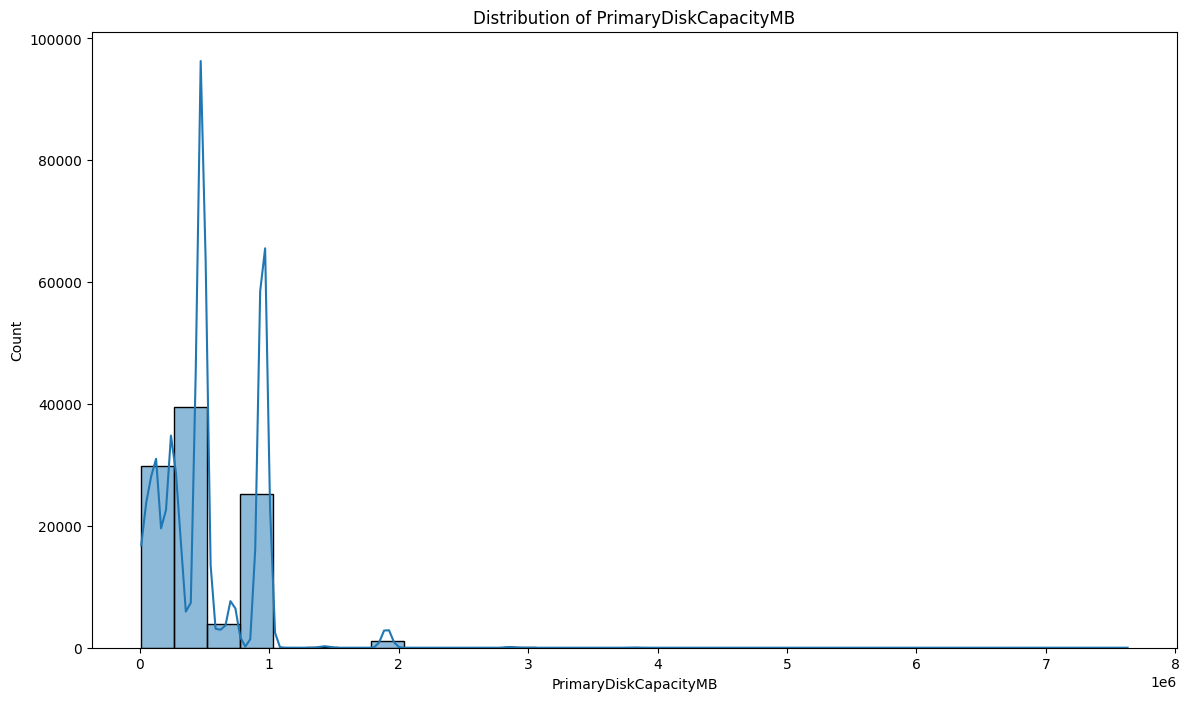

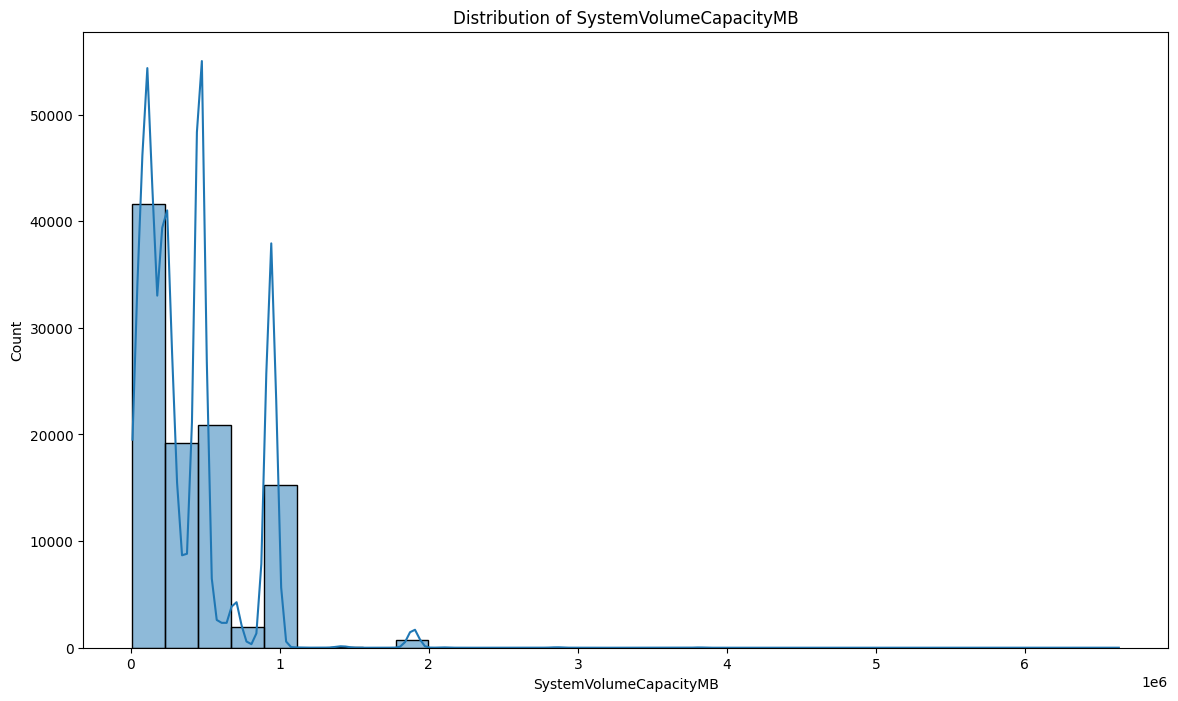

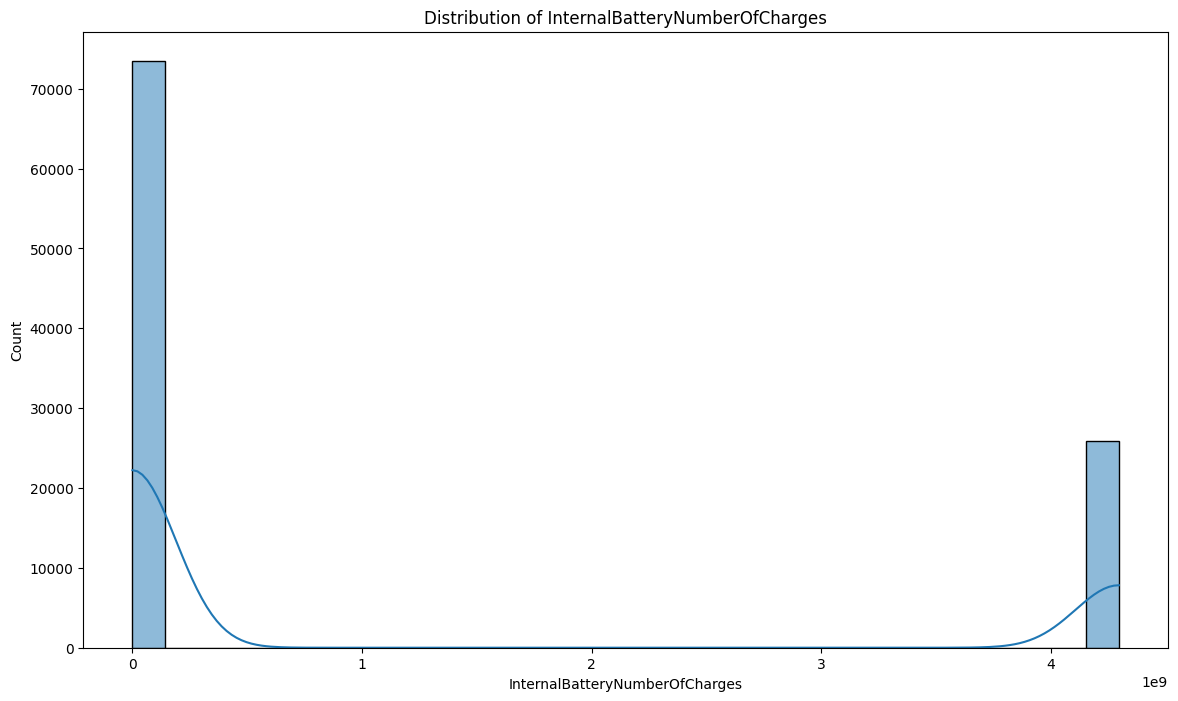

In [40]:
for col in storage_based_numerical_featues:
    plt.figure(figsize=(14, 8))
    sns.histplot(train_data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [41]:
print("Nominal Numerical features:",nominal_numerical_features)

Nominal Numerical features: ['NumAntivirusProductsEnabled', 'NumAntivirusProductsInstalled', 'ProcessorCoreCount', 'RealTimeProtectionState']


In [42]:
train_data[nominal_numerical_features].describe(include='all').round(2)

NumAntivirusProductsEnabled  NumAntivirusProductsInstalled  \
count                     99759.00                       99759.00   
mean                          1.02                           1.33   
std                           0.16                           0.52   
min                           0.00                           1.00   
25%                           1.00                           1.00   
50%                           1.00                           1.00   
75%                           1.00                           2.00   
max                           4.00                           5.00   

       ProcessorCoreCount  RealTimeProtectionState  
count            99750.00                 99769.00  
mean                 4.01                     6.85  
std                  2.03                     1.02  
min                  1.00                     0.00  
25%                  2.00                     7.00  
50%                  4.00                     7.00  
75%                  4.00                     7.00  
max                 64.00                     8.00

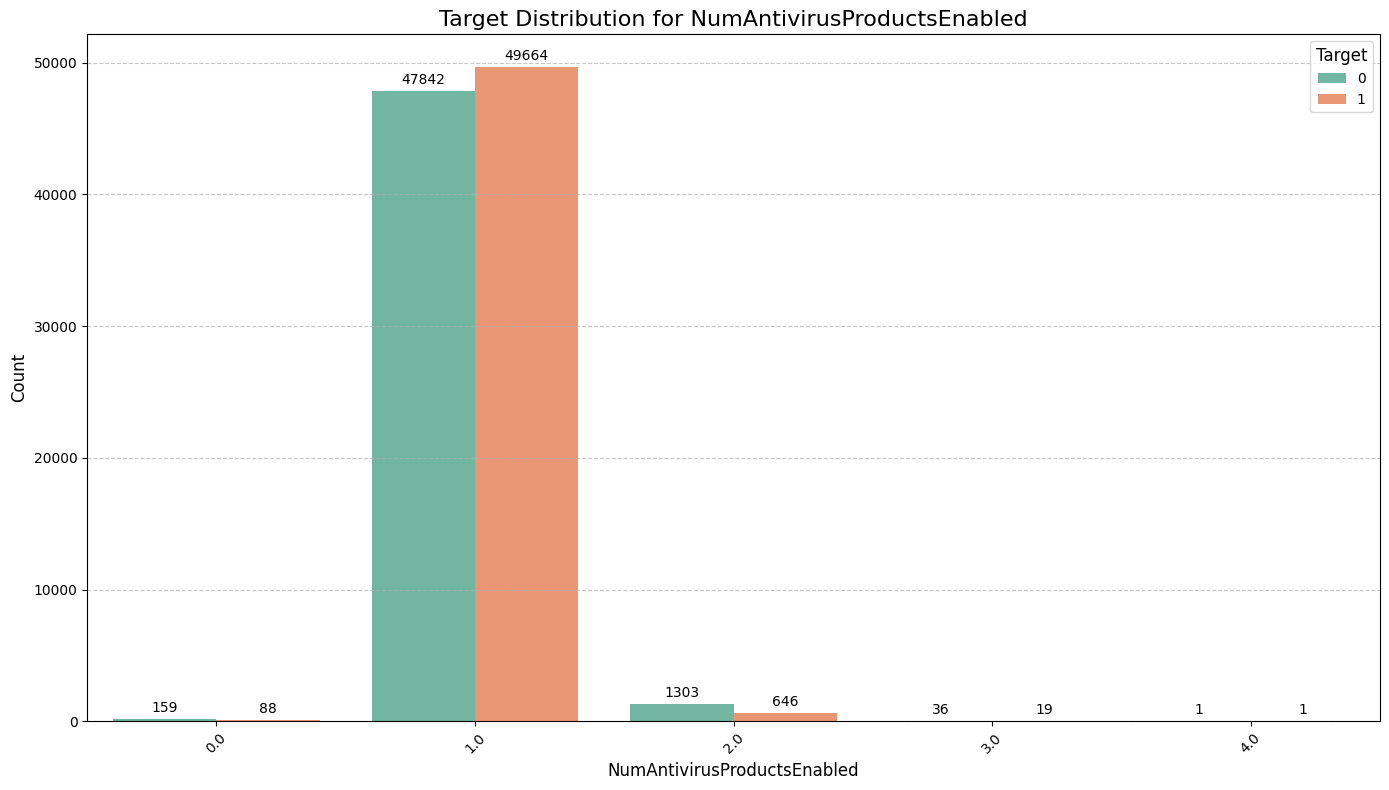

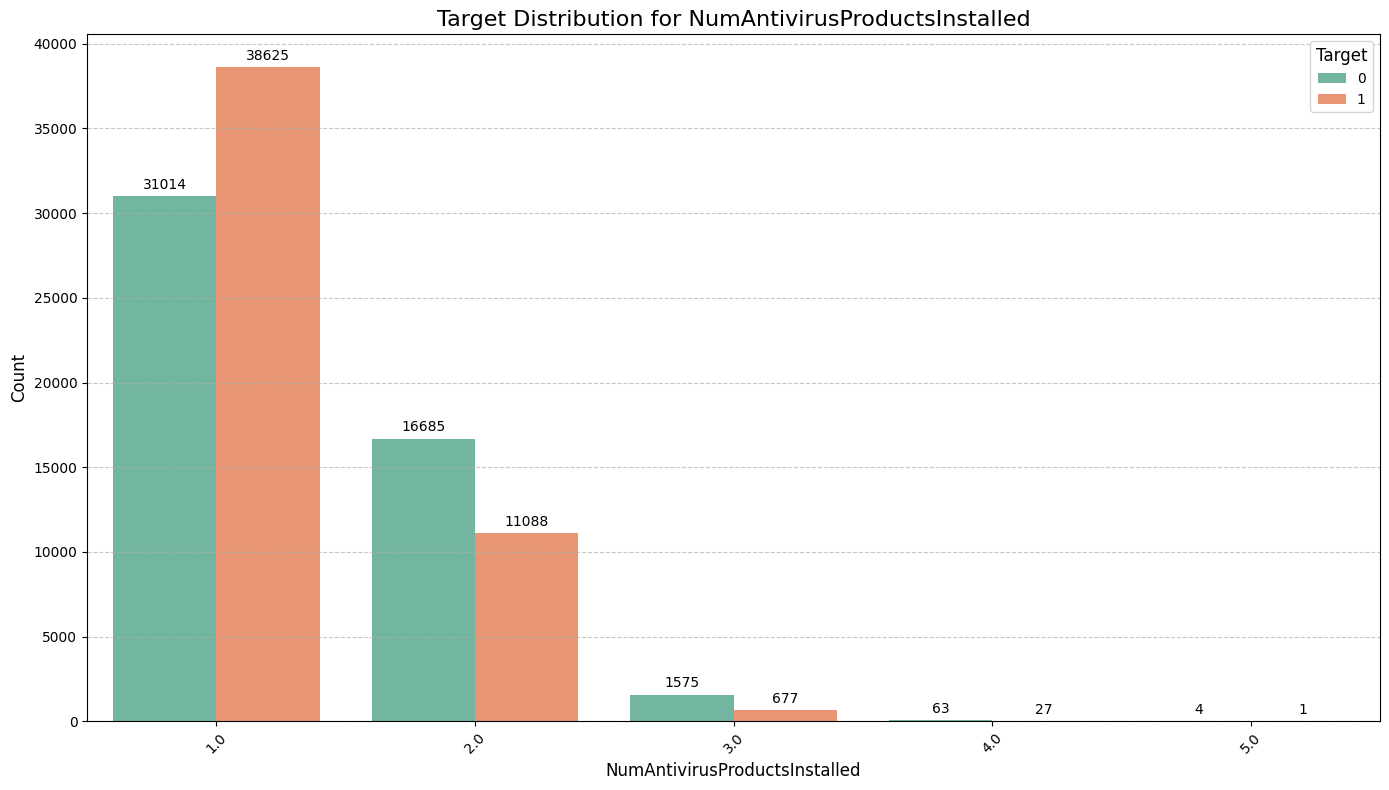

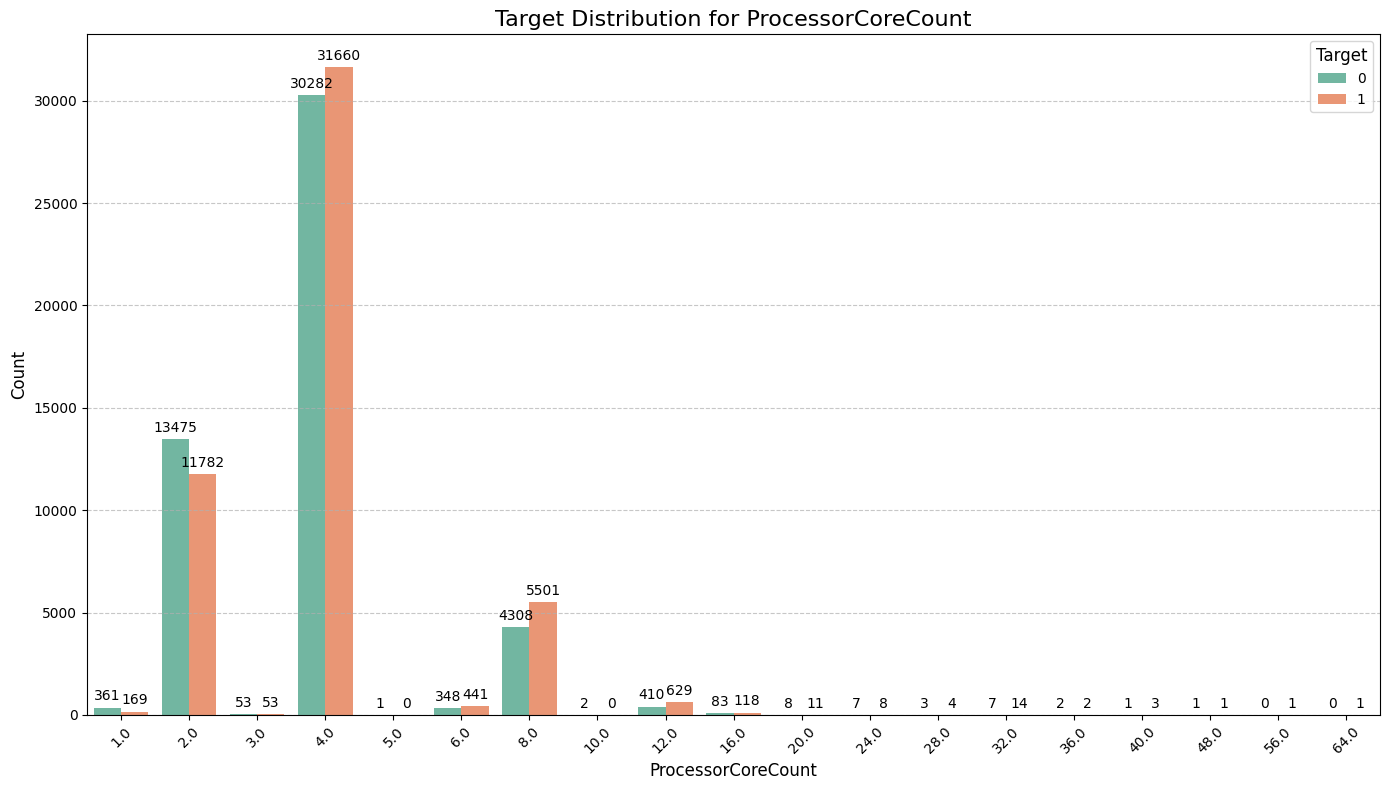

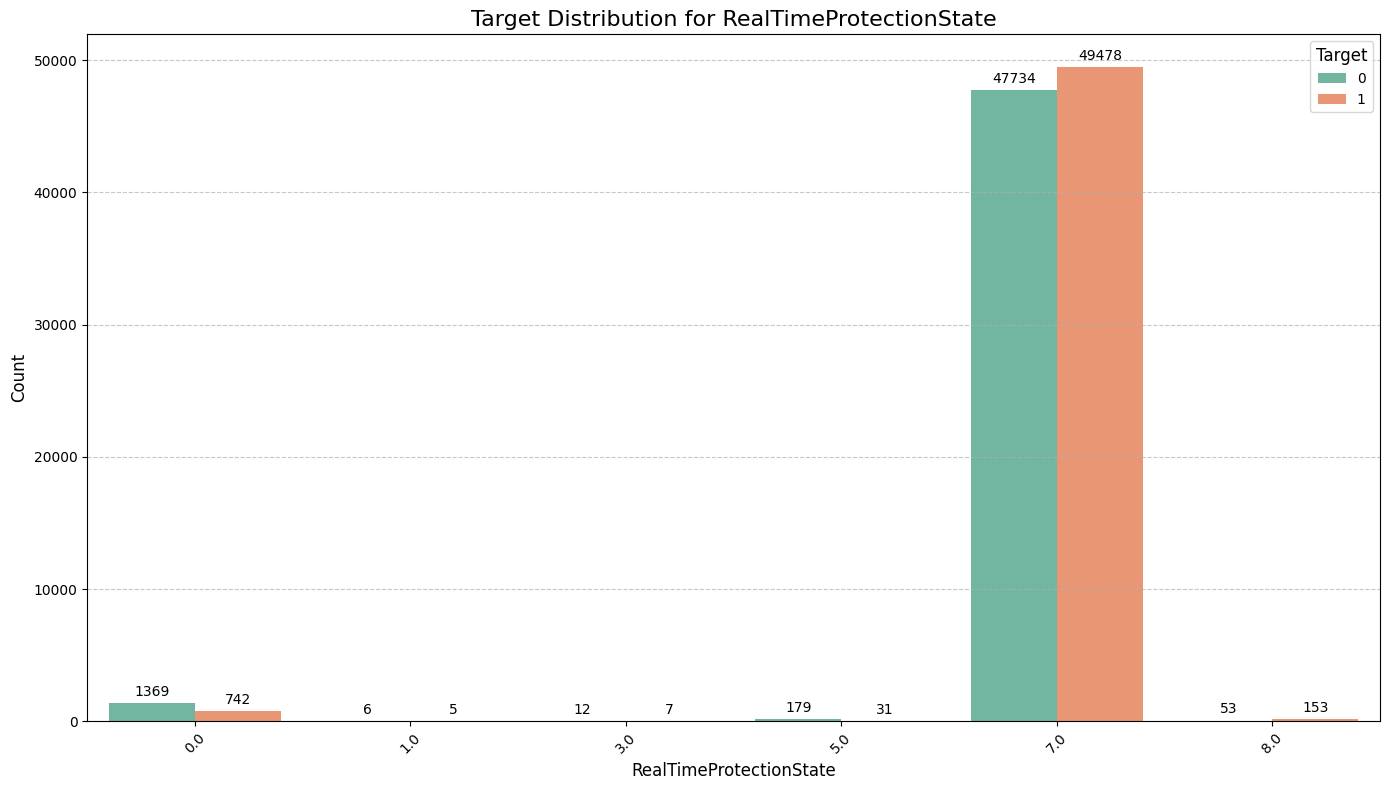

In [43]:
for feature in nominal_numerical_features:
    plt.figure(figsize=(14, 8))
    ax = sns.countplot(data=train_data, x=feature, hue='target', palette='Set2')
    # Annotate bars with counts
    for container in ax.containers:ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)
    plt.title(f'Target Distribution for {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Target', fontsize=10, title_fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

## Key Insights from the Dataset  

- **Antivirus Usage:**  
  - Most systems have **1 antivirus enabled** (mean = 1.02, 75% of values = 1).  
  - Some devices have multiple antivirus products installed (max = 5).  

- **Processor Cores:**  
  - The typical system has **4 CPU cores**, but counts range from **1 to 64**.  

- **Real-Time Protection:**  
  - **Mostly enabled (value = 7)**, but some systems have **no protection (min = 0).**  


## ID Features

In [44]:
for col in ID_numerical_features:
    print(f"Most frequent value in {col} : {train_data[col].mode()[0]}")

Most frequent value in AntivirusConfigID : 53447.0
Most frequent value in LocaleEnglishNameID : 75
Most frequent value in OSProductSuite : 768
Most frequent value in OEMNameID : 2668.0
Most frequent value in OEMModelID : 313586.0
Most frequent value in ProcessorManufacturerID : 5.0
Most frequent value in ProcessorModelID : 2697.0
Most frequent value in OSInstallLanguageID : 8.0
Most frequent value in FirmwareManufacturerID : 142.0
Most frequent value in FirmwareVersionID : 33105.0
Most frequent value in RegionIdentifier : 10.0


## Numerical Features Correlation with Target

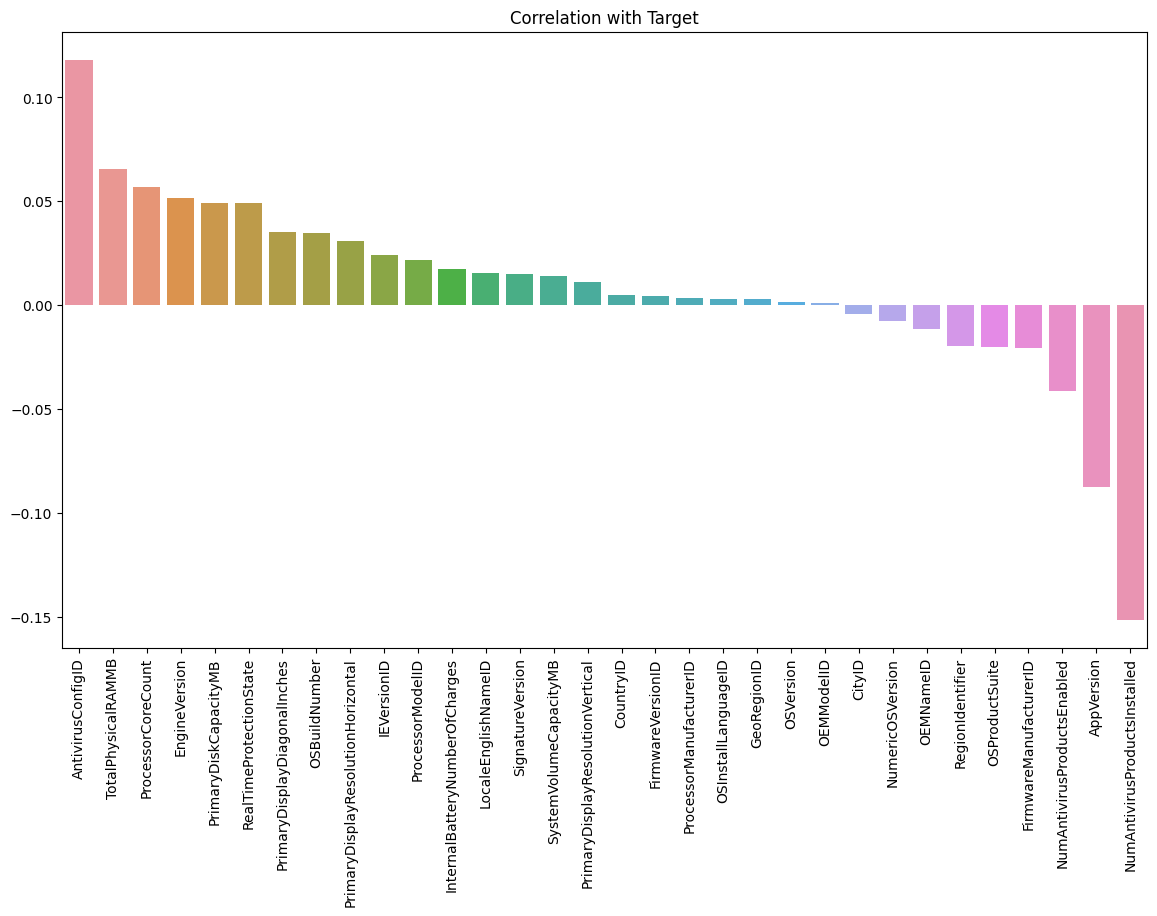

In [45]:
correlation_with_target = train_data[numerical_features].corrwith(train_data["target"]).sort_values(ascending=False)
# print(correlation_with_target)

# Plot correlation with target
plt.figure(figsize=(14, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title("Correlation with Target")
plt.xticks(rotation=90)
plt.show()

## Feature Importance Insights

### Top Influential Features
- **AntivirusConfigID (0.1182)** Likely related to security settings and has the strongest influence.  
- **TotalPhysicalRAMMB (0.0656)** More RAM may correlate with better performance or security.  
- **ProcessorCoreCount (0.0569)** The number of CPU cores significantly impacts the outcome.  
- **EngineVersion (0.0514)** Security engine version plays a crucial role.  
- **PrimaryDiskCapacityMB (0.0491)** Storage capacity affects system stability and performance.  
- **RealTimeProtectionState (0.0491)** The status of real-time protection is a key factor.  

### Moderately Important Features  
- **OSBuildNumber (0.0348)** The operating system version influences security and stability.  
- **PrimaryDisplayDiagonalInches (0.0353)** Device type, such as a laptop or desktop, may be a factor.  
- **PrimaryDisplayResolutionHorizontal (0.0306)** Display size could correlate with system type.  

### Low or Negative Impact Features  
- **CityID (-0.0043), RegionIdentifier (-0.0197), CountryID (0.0046)** Geographic location has minimal effect.  
- **OEMNameID (-0.0117), OEMModelID (0.0009)** Manufacturer details are not strong predictors.  
- **NumAntivirusProductsInstalled (-0.1514)** Multiple antivirus programs may negatively impact performance.  
- **AppVersion (-0.0877)** Certain application versions could be associated with lower stability.  

### Key Takeaways  
- Security settings, including AntivirusConfigID, RealTimeProtectionState, and EngineVersion, are the most critical factors.  
- Hardware specifications, such as RAM, CPU cores, and storage, strongly influence predictions.  
- Location and OEM details contribute little to the outcome.  
- Installing multiple antivirus products may be detrimental.  


# Binary features EDA

In [46]:
print("No of Binary features:",len(binary_features))
print()
binary_features.sort()
print("Binary features:",binary_features)

No of Binary features: 14

Binary features: ['EnableLUA', 'FirewallEnabled', 'HasOpticalDiskDrive', 'HasTpm', 'IsAlwaysOnAlwaysConnectedCapable', 'IsGamer', 'IsPassiveModeEnabled', 'IsPenCapable', 'IsPortableOS', 'IsSecureBootEnabled', 'IsSystemProtected', 'IsTouchEnabled', 'IsVirtualDevice', 'SMode']


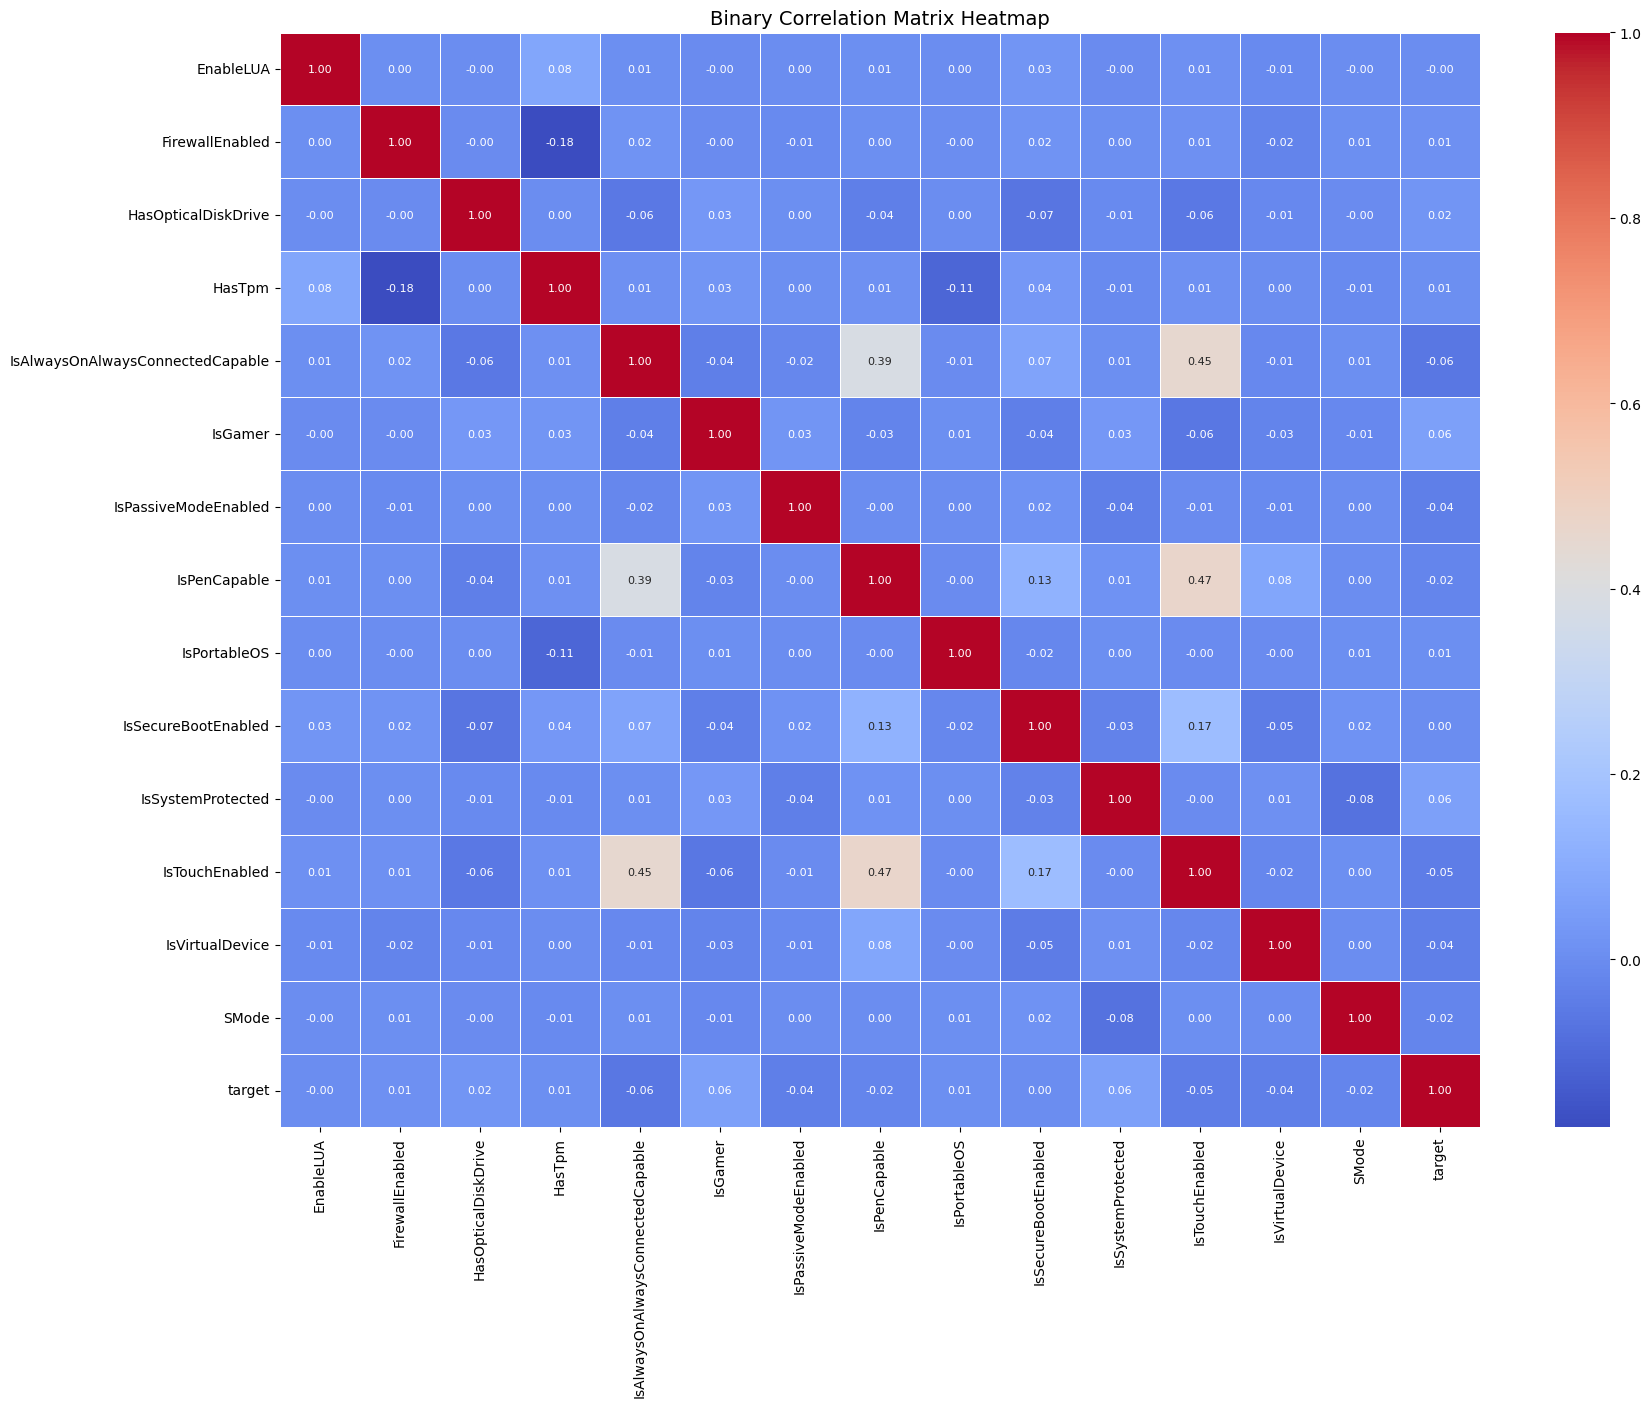

In [47]:
# Encoding binary variables using LabelEncoder
encoder = LabelEncoder()
train_encoded = train_data[binary_features+['target']].apply(encoder.fit_transform)
binary_correlation_matrix = train_encoded.corr(method="spearman")

# Set the size of the figure
plt.figure(figsize=(18, 14))
sns.heatmap(binary_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, xticklabels=binary_correlation_matrix.columns, yticklabels=binary_correlation_matrix.columns, annot_kws={'size': 8})
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Display the plot
plt.title('Binary Correlation Matrix Heatmap', fontsize=14)
plt.show()

In [48]:
for feature in binary_features:
    unique_values = train_data[feature].unique().tolist()
    print("Unique values for",feature,"feature :",unique_values)
    print() 

Unique values for EnableLUA feature : [1.0, 0.0, nan]

Unique values for FirewallEnabled feature : [1.0, 0.0, nan]

Unique values for HasOpticalDiskDrive feature : [0, 1]

Unique values for HasTpm feature : [1, 0]

Unique values for IsAlwaysOnAlwaysConnectedCapable feature : [1.0, 0.0, nan]

Unique values for IsGamer feature : [0.0, 1.0, nan]

Unique values for IsPassiveModeEnabled feature : [0, 1]

Unique values for IsPenCapable feature : [0, 1]

Unique values for IsPortableOS feature : [0, 1]

Unique values for IsSecureBootEnabled feature : [0, 1]

Unique values for IsSystemProtected feature : [1.0, 0.0, nan]

Unique values for IsTouchEnabled feature : [1, 0]

Unique values for IsVirtualDevice feature : [0.0, 1.0, nan]

Unique values for SMode feature : [0.0, nan, 1.0]



In [49]:
# missing values count
missing_values=train_data[binary_features].isnull().sum()
missing_values[missing_values>0]

EnableLUA                            22
FirewallEnabled                     166
IsAlwaysOnAlwaysConnectedCapable    134
IsGamer                             559
IsSystemProtected                    76
IsVirtualDevice                      20
SMode                               981
dtype: int64

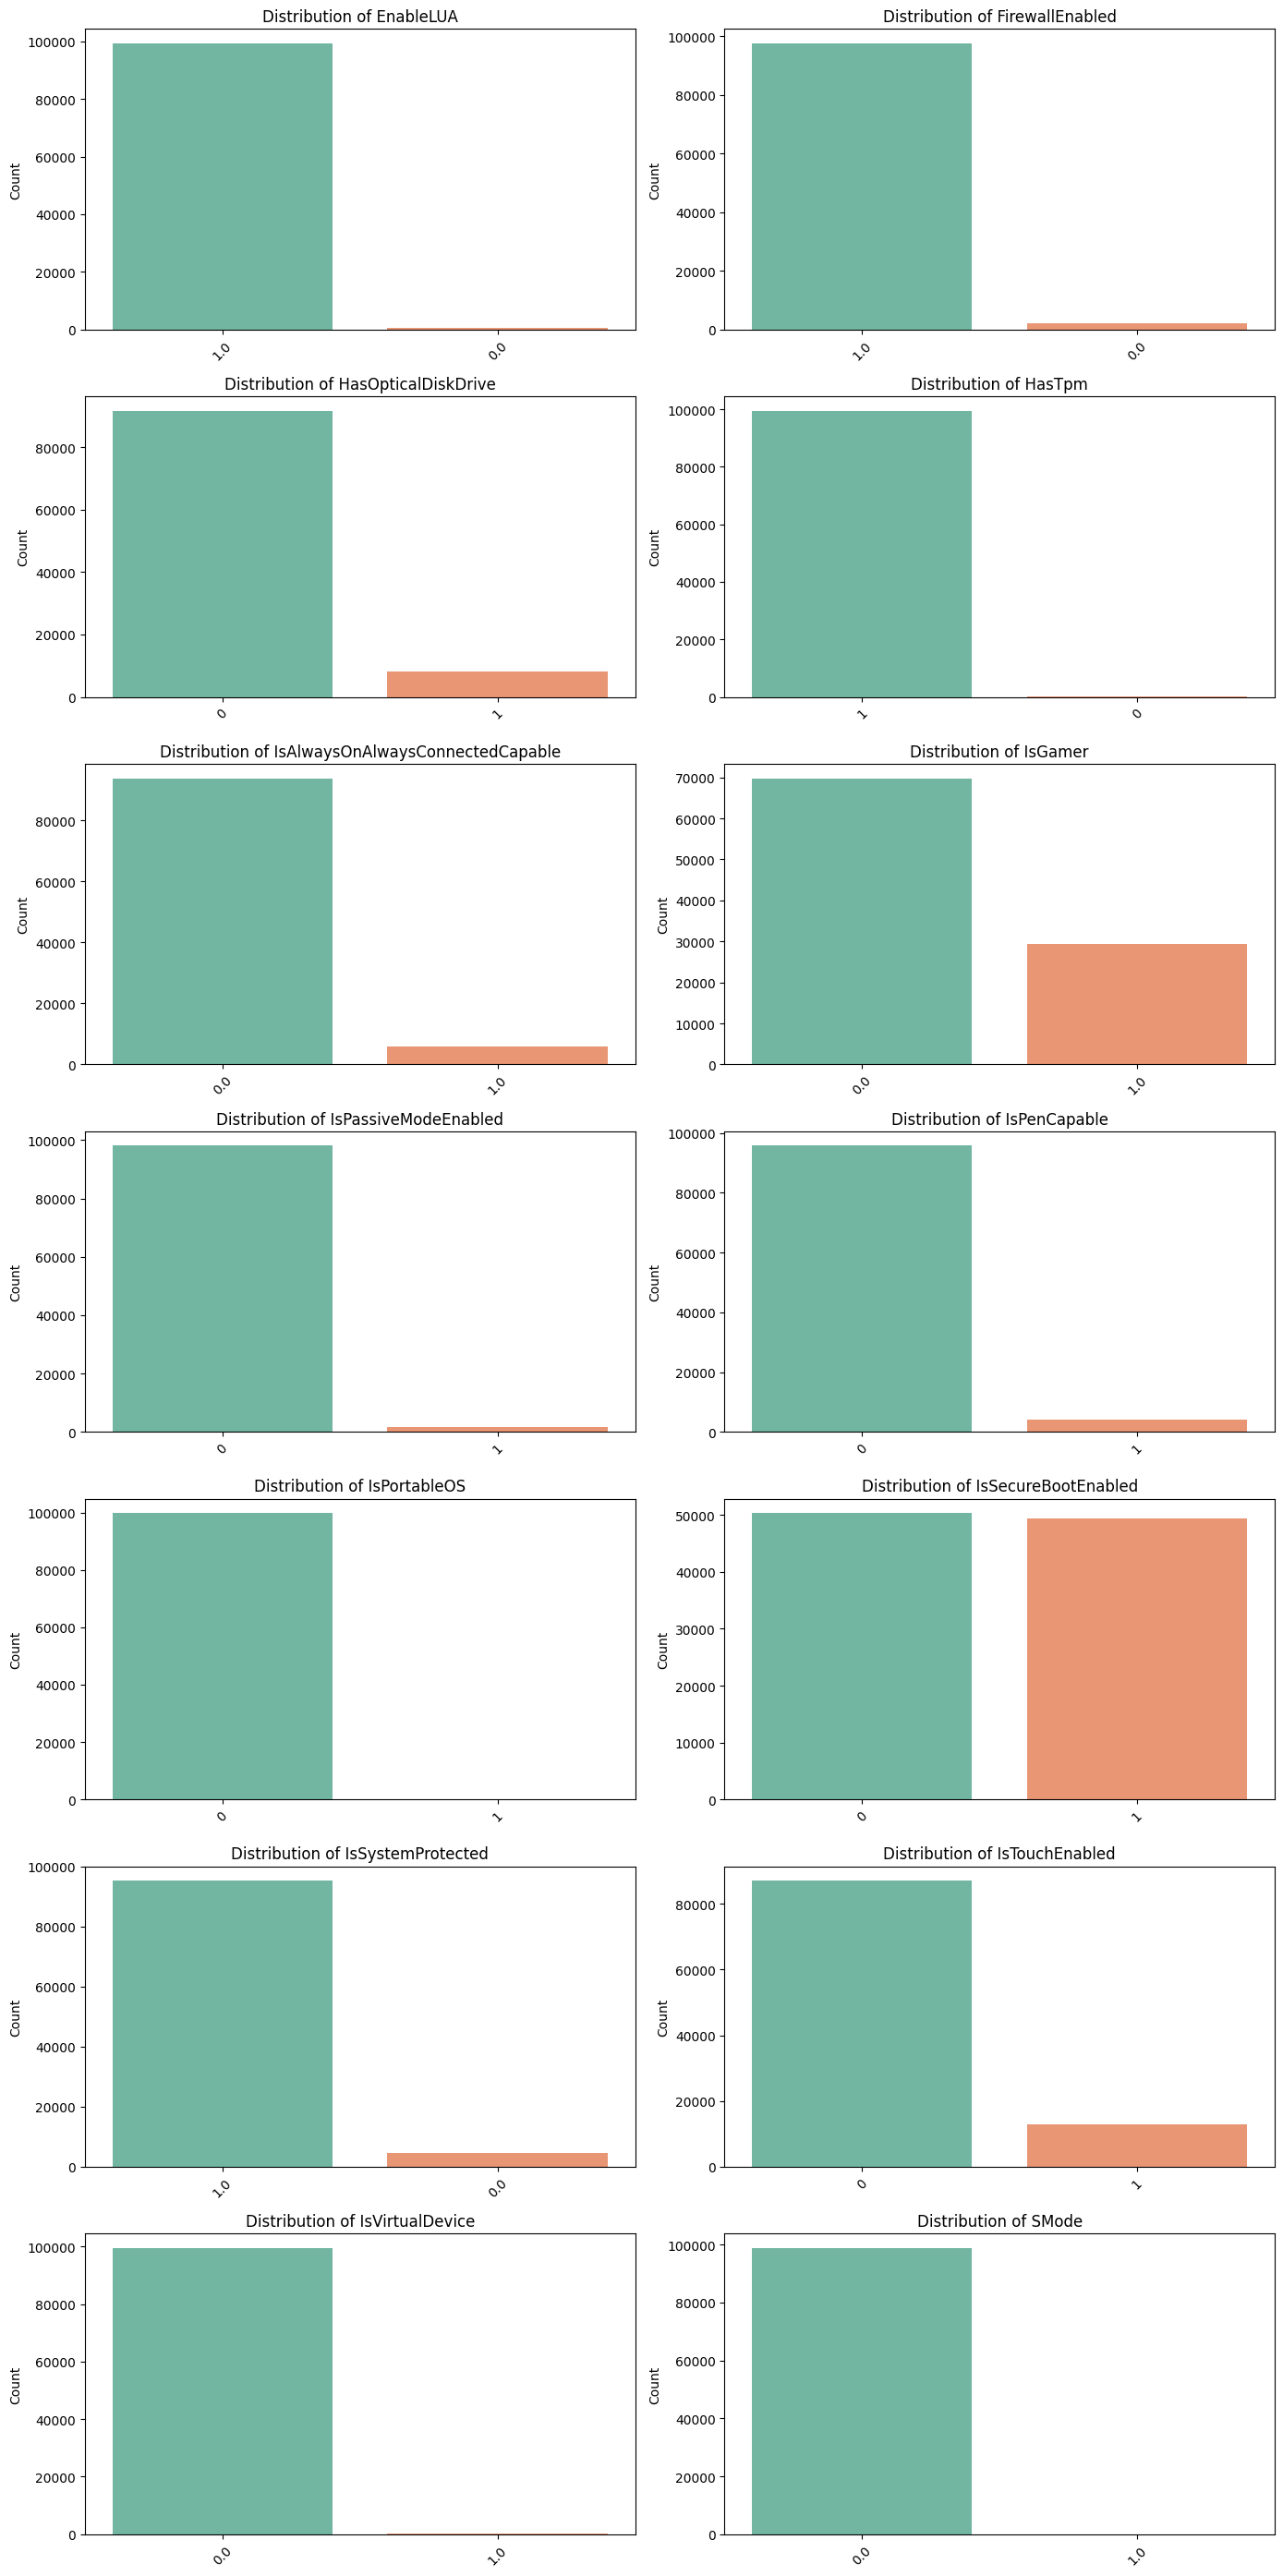

In [50]:
cols = 2  # Number of plots per row
rows = math.ceil(len(binary_features) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 7, rows * 4))
axes = axes.flatten()  # Flatten for easy iteration

for i, feature in enumerate(binary_features):
    sns.countplot(data=train_data, x=feature, palette='Set2', ax=axes[i], 
                  order=train_data[feature].dropna().value_counts().index)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

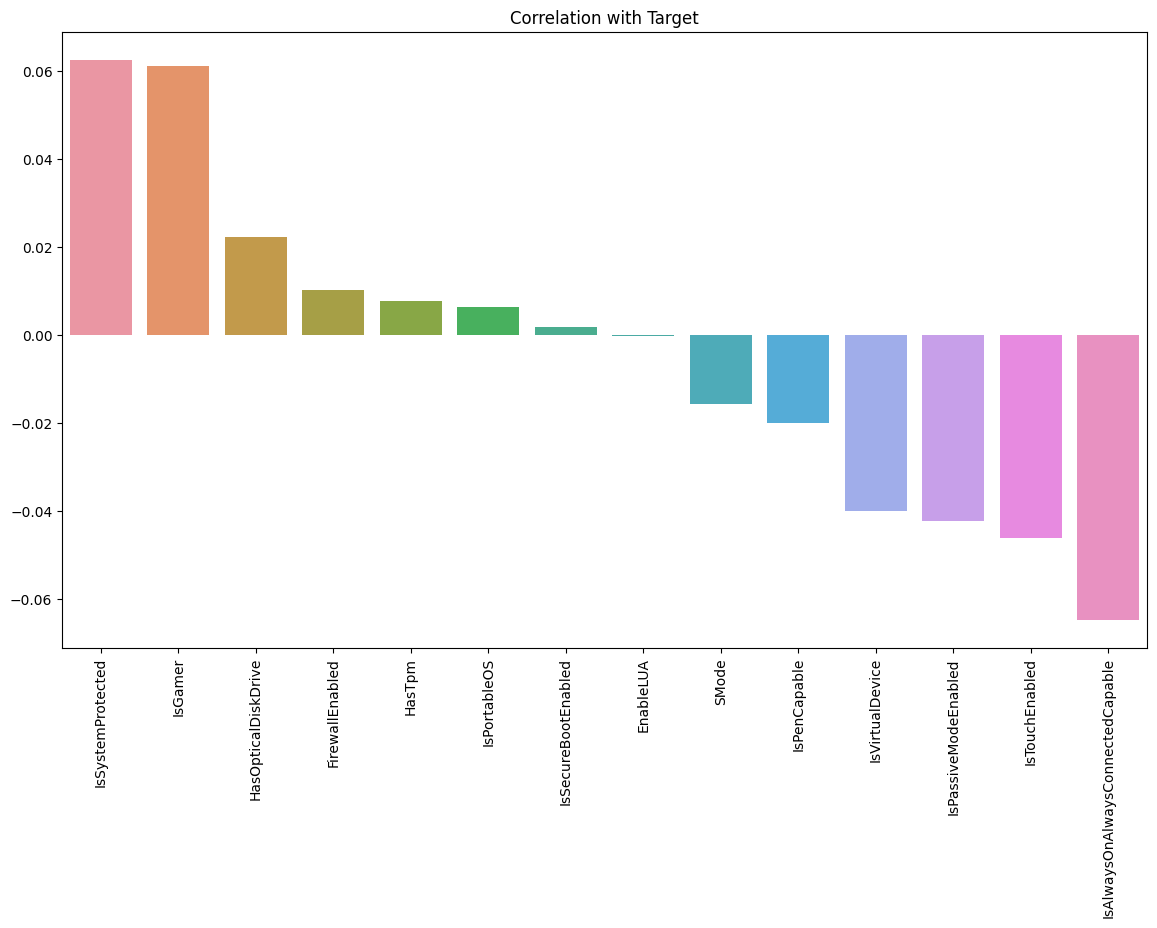

In [51]:
correlation_with_target = train_data[binary_features].corrwith(train_data["target"]).sort_values(ascending=False)
# print(correlation_with_target)

# Plot correlation with target
plt.figure(figsize=(14, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title("Correlation with Target")
plt.xticks(rotation=90)
plt.show()

## Feature Importance Insights  

## Most Important Features  
- **IsSystemProtected (0.0625)** and **IsGamer (0.0612)** have the highest importance scores.  
  - These features significantly influence the model’s predictions.  
  - If related to cybersecurity or system classification, protected systems (`IsSystemProtected`) and gaming machines (`IsGamer`) may strongly correlate with security status or performance tuning.  

## Moderately Important Features  
- **HasOpticalDiskDrive (0.0224)** and **FirewallEnabled (0.0102)** have some influence.  
  - Optical disk drives are less common today, but they might still impact system security configurations.  
  - Firewalls contribute positively, but not as strongly as system protection.  

## Least Important Features  
- **IsSecureBootEnabled (0.0019)**, **EnableLUA (-0.0003)**, and **SMode (-0.0156)** have minimal impact.  
  - Secure Boot and User Account Control (LUA) settings do not strongly differentiate the target outcome.  

## Negatively Correlated Features  
- **IsAlwaysOnAlwaysConnectedCapable (-0.0647)**, **IsTouchEnabled (-0.0459)**, and **IsPassiveModeEnabled (-0.0421)** negatively influence the target.  
  - Devices with always-on connectivity, touchscreen capabilities, or passive modes might be less prone to certain risks (e.g., lower exposure to specific vulnerabilities).  

## Key Takeaways  
- **Security Features Matter:** System protection (`IsSystemProtected`) and firewall status (`FirewallEnabled`) contribute positively to the outcome.  
- **Gaming Systems Are Important:** `IsGamer` is highly significant, suggesting that gaming machines exhibit distinct security or performance characteristics.  
- **Some Features Are Not Critical:** `SMode` and `EnableLUA` have minimal impact, meaning their presence or absence does not significantly change predictions.  
- **Touch & Always-On Devices Behave Differently:** These features are negatively correlated, indicating they may be inherently more secure or operate in different environments.  



# Categorical features EDA

In [52]:
categorical_features.sort()
print("No of Categorical features :",len(categorical_features))
print()
print("Categorical features :",categorical_features)

No of Categorical features : 22

Categorical features : ['AutoUpdateOptionsName', 'ChassisType', 'DateAS', 'DateOS', 'DeviceFamily', 'FlightRing', 'LicenseActivationChannel', 'MDC2FormFactor', 'OSArchitecture', 'OSBranch', 'OSBuildLab', 'OSEdition', 'OSGenuineState', 'OSInstallType', 'OSSkuFriendlyName', 'OsPlatformSubRelease', 'PlatformType', 'PowerPlatformRole', 'PrimaryDiskType', 'Processor', 'ProductName', 'SKUEditionName']


In [53]:
normal_categorical_features=[]
high_uniq_categorical_features=[]
for feature in categorical_features:
    if train_data[feature].nunique()<30:
       normal_categorical_features=normal_categorical_features+[feature]
    else:
        high_uniq_categorical_features=high_uniq_categorical_features+[feature]  

print("Nominal Categorical Features :",normal_categorical_features)
print()
print("Categorical Features with many unique values :",high_uniq_categorical_features)

Nominal Categorical Features : ['AutoUpdateOptionsName', 'ChassisType', 'DeviceFamily', 'FlightRing', 'LicenseActivationChannel', 'MDC2FormFactor', 'OSArchitecture', 'OSBranch', 'OSEdition', 'OSGenuineState', 'OSInstallType', 'OSSkuFriendlyName', 'OsPlatformSubRelease', 'PlatformType', 'PowerPlatformRole', 'PrimaryDiskType', 'Processor', 'ProductName', 'SKUEditionName']

Categorical Features with many unique values : ['DateAS', 'DateOS', 'OSBuildLab']


In [54]:
# Get unique values for each Categorical feature
for feature in normal_categorical_features :
    unique_values = train_data[feature].unique().tolist()
    print("Unique values for",feature,"feature :",unique_values)
    print()

Unique values for AutoUpdateOptionsName feature : ['UNKNOWN', 'FullAuto', 'AutoInstallAndRebootAtMaintenanceTime', 'Notify', 'Off', 'DownloadNotify']

Unique values for ChassisType feature : ['Notebook', 'AllinOne', 'Desktop', 'Tower', 'Laptop', 'Portable', 'Convertible', 'UNKNOWN', 'LowProfileDesktop', 'Detachable', 'SpaceSaving', 'Tablet', 'Other', 'LunchBox', 'MainServerChassis', 'MiniTower', 'HandHeld', 'CompactPCI', nan, '0', 'SubNotebook', 'Unknown', 'BusExpansionChassis', 'MiniPC', '30', 'RackMountChassis', 'SubChassis', 'MultisystemChassis', '35']

Unique values for DeviceFamily feature : ['Windows.Desktop', 'Windows.Server']

Unique values for FlightRing feature : ['Retail', 'NOT_SET', 'Unknown', 'WIS', 'RP', 'Disabled', 'WIF']

Unique values for LicenseActivationChannel feature : ['Retail', 'OEM:DM', 'OEM:NONSLP', 'Volume:GVLK', 'Volume:MAK', 'Retail:TB:Eval']

Unique values for MDC2FormFactor feature : ['SmallTablet', 'AllInOne', 'Desktop', 'Notebook', 'LargeTablet', 'Conver

## **Insights**  
- **Redundant categories (`OSEdition` vs. `OSSkuFriendlyName`)**.  
- **Useful for feature engineering, system diagnostics, ML models**.  
- **`UNKNOWN` and `nan` require cleaning**.  


# Data Cleaning

In [55]:
# checking missing values count
missing_values=train_data[categorical_features].isnull().sum()
print('Train missing data :')
print(missing_values[missing_values>0])
print()
missing_values=test_data[categorical_features].isnull().sum()
print('Test missing data :')
print(missing_values[missing_values>0])

Train missing data :
ChassisType         2
DateOS             24
PrimaryDiskType    23
dtype: int64

Test missing data :
DateOS             3
PrimaryDiskType    4
dtype: int64


In [56]:
train_data["DateOS"] = train_data["DateOS"].fillna(train_data["DateOS"].mode()[0])
test_data["DateOS"] = test_data["DateOS"].fillna(test_data["DateOS"].mode()[0])

In [57]:
def FeatureEngineering(feature_list,function_name):
    for feature in feature_list:
        print('Feature Name :' , feature)
        print()
        print("Train Before:")
        print(train_data[feature].unique().tolist())
        print()
        train_data[feature] = train_data[feature].astype('category').cat.add_categories(['nan']).fillna('nan').astype(str).apply(function_name).astype('category').cat.remove_unused_categories()
        print("Train After:")
        print(train_data[feature].unique().tolist())
        print()
        print("Test Before:")
        print(test_data[feature].unique().tolist())
        print()
        test_data[feature] = test_data[feature].astype('category').cat.add_categories(['nan']).fillna('nan').astype(str).apply(function_name).astype('category').cat.remove_unused_categories()
        print("Test After:")
        print(test_data[feature].unique().tolist())
        print()

In [58]:
def Process_ChassisType(feature_val):
    feature_val = feature_val.lower()    
    if 'laptop' in feature_val:
        return 'notebook'
    elif 'notebook' in feature_val:
        return 'notebook'
    elif 'portable' in feature_val:
        return 'notebook'
    elif 'compactpci' in feature_val:
        return 'notebook'
    elif 'multisystemchassis' in feature_val:
        return 'notebook'
    elif 'other' in feature_val:
        return 'notebook'
    elif 'minipc' in feature_val:
        return 'desktop'
    elif 'subchassis' in feature_val:
        return 'desktop'
    elif 'tower' in feature_val:
        return 'desktop'
    elif 'desktop' in feature_val:
        return 'desktop'
    elif 'lunchbox' in feature_val:
        return 'desktop'
    elif 'spacesaving' in feature_val:
        return 'desktop'
    elif 'handheld' in feature_val:
        return 'detachable'
    elif 'mainserverchassis' in feature_val:
        return 'detachable' 
    elif 'rackmountchassis' in feature_val:
        return 'server'
    elif 'busexpansionchassis' in feature_val:
        return 'tablet'
    elif feature_val.isdigit():
        return 'unknown'
    elif feature_val=='nan':
        return 'unknown'
    else:
        return feature_val


FeatureEngineering(['ChassisType'],Process_ChassisType)

Feature Name : ChassisType

Train Before:
['Notebook', 'AllinOne', 'Desktop', 'Tower', 'Laptop', 'Portable', 'Convertible', 'UNKNOWN', 'LowProfileDesktop', 'Detachable', 'SpaceSaving', 'Tablet', 'Other', 'LunchBox', 'MainServerChassis', 'MiniTower', 'HandHeld', 'CompactPCI', nan, '0', 'SubNotebook', 'Unknown', 'BusExpansionChassis', 'MiniPC', '30', 'RackMountChassis', 'SubChassis', 'MultisystemChassis', '35']

Train After:
['notebook', 'allinone', 'desktop', 'convertible', 'unknown', 'detachable', 'tablet', 'server']

Test Before:
['Notebook', 'AllinOne', 'Desktop', 'Laptop', 'Portable', 'Detachable', 'Convertible', 'LowProfileDesktop', 'UNKNOWN', 'MiniTower', 'Tablet', 'Tower', 'HandHeld', 'SpaceSaving', 'Other', 'MiniPC', 'Unknown', 'MainServerChassis', 'LunchBox', 'BusExpansionChassis', 'SubNotebook']

Test After:
['notebook', 'allinone', 'desktop', 'detachable', 'convertible', 'unknown', 'tablet']



In [59]:
print(train_data["PrimaryDiskType"].value_counts())

PrimaryDiskType
HDD            66083
SSD            27862
UNKNOWN         3099
Unspecified     2768
Name: count, dtype: int64


In [60]:
def Processing_PrimaryDiskType(feature_val):
    feature_val = feature_val.lower()
    if feature_val not in ['ssd', 'hdd']:
        return 'unknown'
    elif feature_val=='nan':
        return 'unknown'
    else:
        return feature_val

FeatureEngineering(['PrimaryDiskType'],Processing_PrimaryDiskType)

Feature Name : PrimaryDiskType

Train Before:
['SSD', 'HDD', 'Unspecified', 'UNKNOWN', nan]

Train After:
['ssd', 'hdd', 'unknown']

Test Before:
['HDD', 'SSD', 'Unspecified', 'UNKNOWN', nan]

Test After:
['hdd', 'ssd', 'unknown']



In [61]:
# verifying missing values count
missing_values=train_data[categorical_features].isnull().sum()
print('Train missing data :')
print(missing_values[missing_values>0])
print()
missing_values=test_data[categorical_features].isnull().sum()
print('Test missing data :')
print(missing_values[missing_values>0])

Train missing data :
Series([], dtype: int64)

Test missing data :
Series([], dtype: int64)


# Feature Engineering

In [62]:
print(train_data["AutoUpdateOptionsName"].value_counts())

AutoUpdateOptionsName
FullAuto                                 45088
UNKNOWN                                  26256
Notify                                   23700
AutoInstallAndRebootAtMaintenanceTime     4435
Off                                        327
DownloadNotify                              29
Name: count, dtype: int64


In [63]:
def Processing_AutoUpdateOptionsName(feature_val):
    feature_val = feature_val.lower()
    if 'download' in feature_val:
        return 'download'
    elif 'notify' in feature_val:
        return 'notify'
    elif feature_val=='nan':
        return 'unknown'
    else:
        return feature_val

FeatureEngineering(['AutoUpdateOptionsName'],Processing_AutoUpdateOptionsName)

Feature Name : AutoUpdateOptionsName

Train Before:
['UNKNOWN', 'FullAuto', 'AutoInstallAndRebootAtMaintenanceTime', 'Notify', 'Off', 'DownloadNotify']

Train After:
['unknown', 'fullauto', 'autoinstallandrebootatmaintenancetime', 'notify', 'off', 'download']

Test Before:
['FullAuto', 'Notify', 'AutoInstallAndRebootAtMaintenanceTime', 'Off', 'UNKNOWN', 'DownloadNotify']

Test After:
['fullauto', 'notify', 'autoinstallandrebootatmaintenancetime', 'off', 'unknown', 'download']



In [64]:
data = pd.DataFrame(train_data.loc[:, ["PlatformType", "DeviceFamily"]])
print(data["PlatformType"].value_counts())
print()
print(data["DeviceFamily"].value_counts())

PlatformType
windows10      98183
windows8        1397
windows7         226
windows2016       29
Name: count, dtype: int64

DeviceFamily
Windows.Desktop    99806
Windows.Server        29
Name: count, dtype: int64


In [65]:
def Processing_DeviceFamily(feature_val):
    feature_val = feature_val.lower()
    if 'desktop' in feature_val:
        return 'desktop'   
    if 'server' in feature_val:
        return 'server' 
    elif feature_val=='nan':
        return 'unknown'
    else:
        return feature_val

FeatureEngineering(['DeviceFamily'],Processing_DeviceFamily)

Feature Name : DeviceFamily

Train Before:
['Windows.Desktop', 'Windows.Server']

Train After:
['desktop', 'server']

Test Before:
['Windows.Desktop', 'Windows.Server']

Test After:
['desktop', 'server']



In [66]:
def Process_PlatformType(feature_val):
    feature_val = feature_val.lower()    
    if 'windows2016' in feature_val:
        return 'server'
    elif feature_val=='nan':
        return 'unknown'
    else:
        return feature_val


FeatureEngineering(['PlatformType'],Process_PlatformType)

Feature Name : PlatformType

Train Before:
['windows10', 'windows8', 'windows7', 'windows2016']

Train After:
['windows10', 'windows8', 'windows7', 'server']

Test Before:
['windows10', 'windows8', 'windows7', 'windows2016']

Test After:
['windows10', 'windows8', 'windows7', 'server']



In [67]:
print(train_data["OSInstallType"].value_counts())

OSInstallType
UUPUpgrade        31977
Update            17090
IBSClean          16574
Upgrade           14541
Other              8912
Reset              7135
Refresh            2207
Clean               797
CleanPCRefresh      602
Name: count, dtype: int64


In [68]:
for feature in normal_categorical_features:
    train_data[feature] = train_data[feature].astype(str).str.lower().astype('category')
    test_data[feature] = test_data[feature].astype(str).str.lower().astype('category')

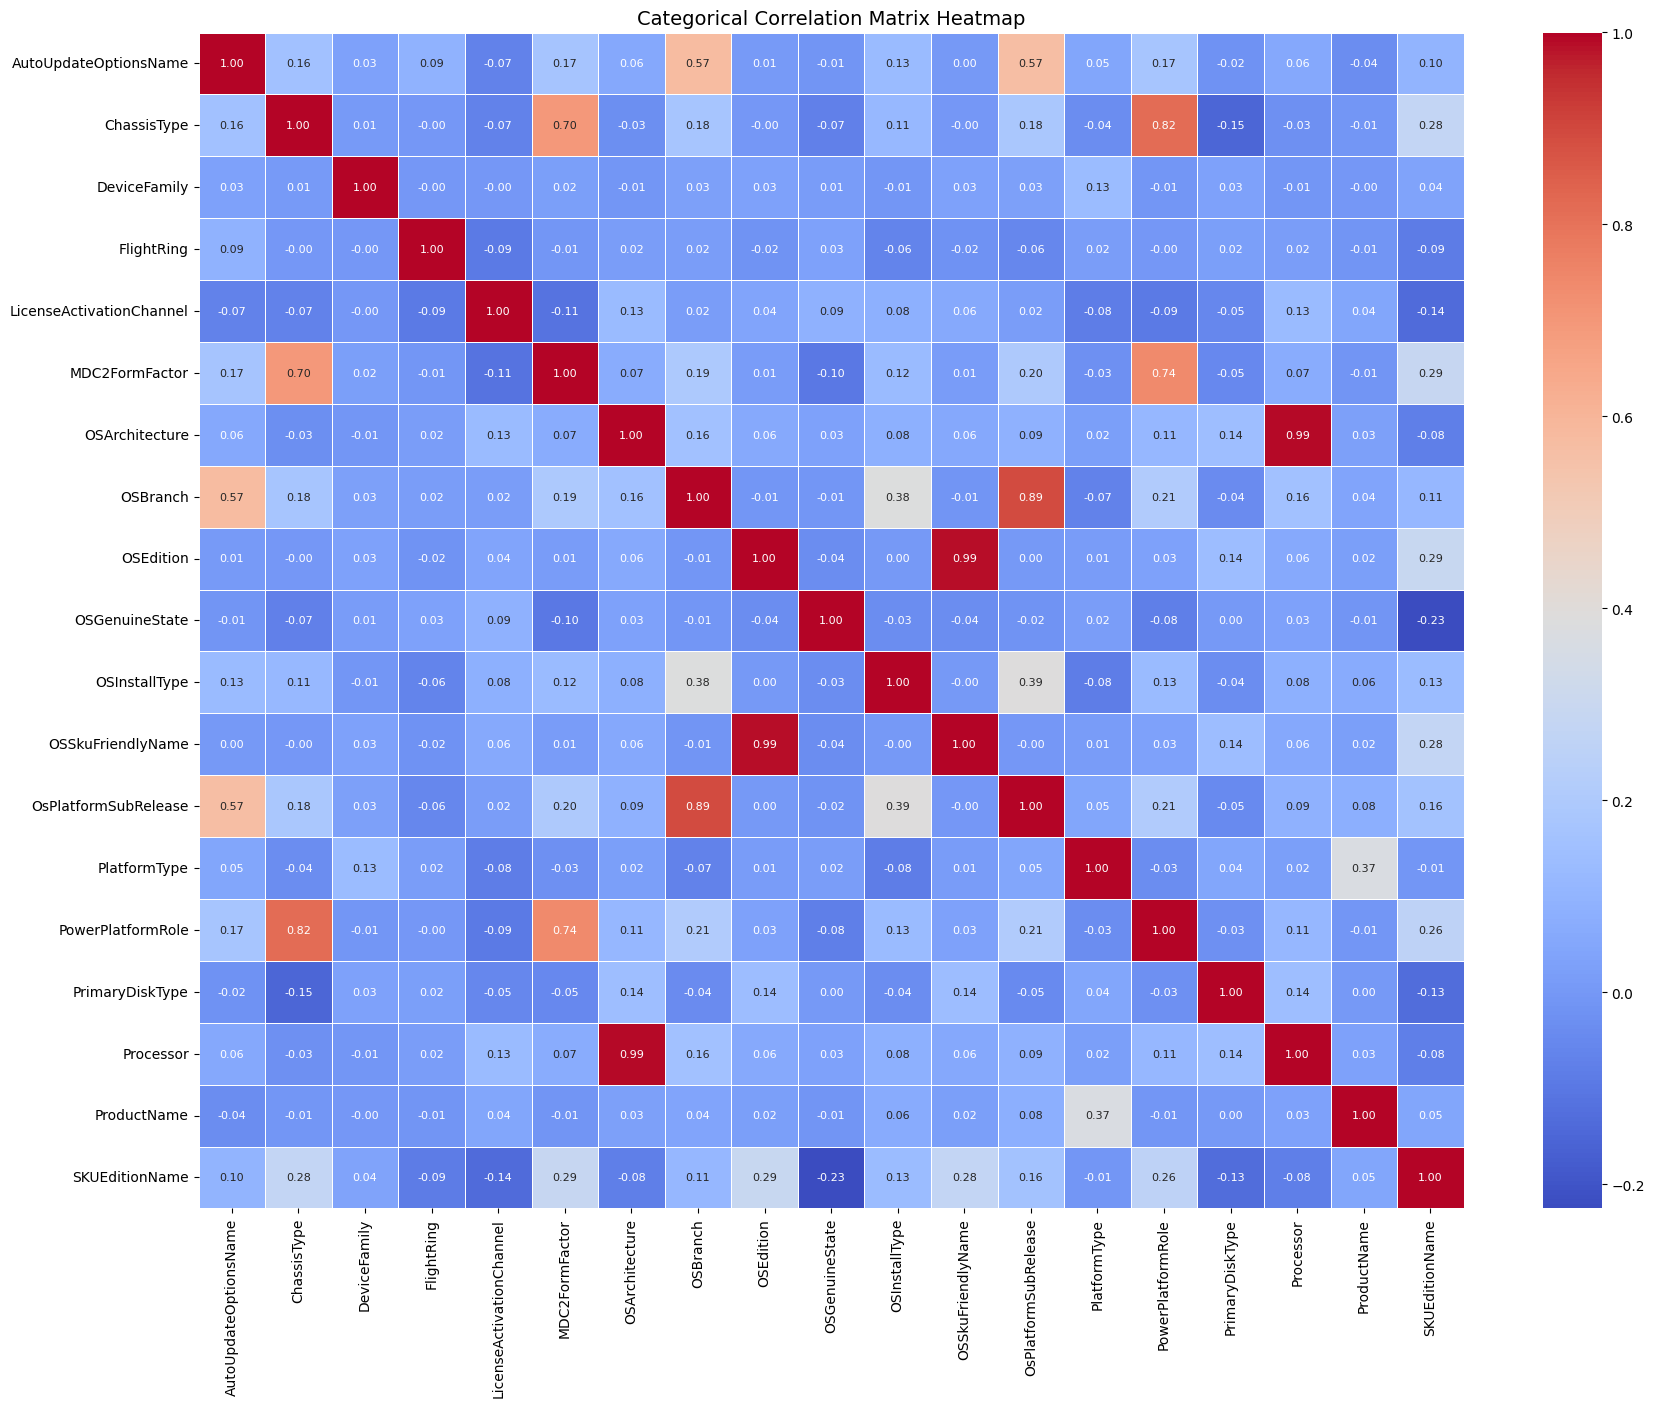

In [69]:
# Initialize an empty dictionary for encoding
target_encoded_data = train_data[normal_categorical_features].copy()

for feature in normal_categorical_features:
    target_encoded_data[feature] = target_encoded_data[feature].map(train_data.groupby(feature)['target'].mean())

categorical_correlation_matrix = target_encoded_data.corr(method="spearman")

plt.figure(figsize=(18, 14))
sns.heatmap(categorical_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, xticklabels=categorical_correlation_matrix.columns, yticklabels=categorical_correlation_matrix.columns, annot_kws={'size': 8})  # Reduce annotation font size
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Display the plot
plt.title('Categorical Correlation Matrix Heatmap', fontsize=14)
plt.show()

In [70]:
high_correlated_columns = set()

for i in range(len(categorical_correlation_matrix.columns)):
    for j in range(i):
        if abs(categorical_correlation_matrix.iloc[i, j]) > 0.90:
            high_correlated_columns.add(categorical_correlation_matrix.columns[i])
            print((categorical_correlation_matrix.columns[i], categorical_correlation_matrix.columns[j], categorical_correlation_matrix.iloc[i, j]))

print("Highly Correlated Columns:", list(high_correlated_columns))

('OSSkuFriendlyName', 'OSEdition', 0.9878028165294664)
('Processor', 'OSArchitecture', 0.9942813817274226)
Highly Correlated Columns: ['Processor', 'OSSkuFriendlyName']


In [71]:
# Droping high correlation for categorical features
train_data = train_data.drop(columns=high_correlated_columns)
test_data = test_data.drop(columns=high_correlated_columns)
normal_categorical_features = [feature for feature in normal_categorical_features if feature not in high_correlated_columns]

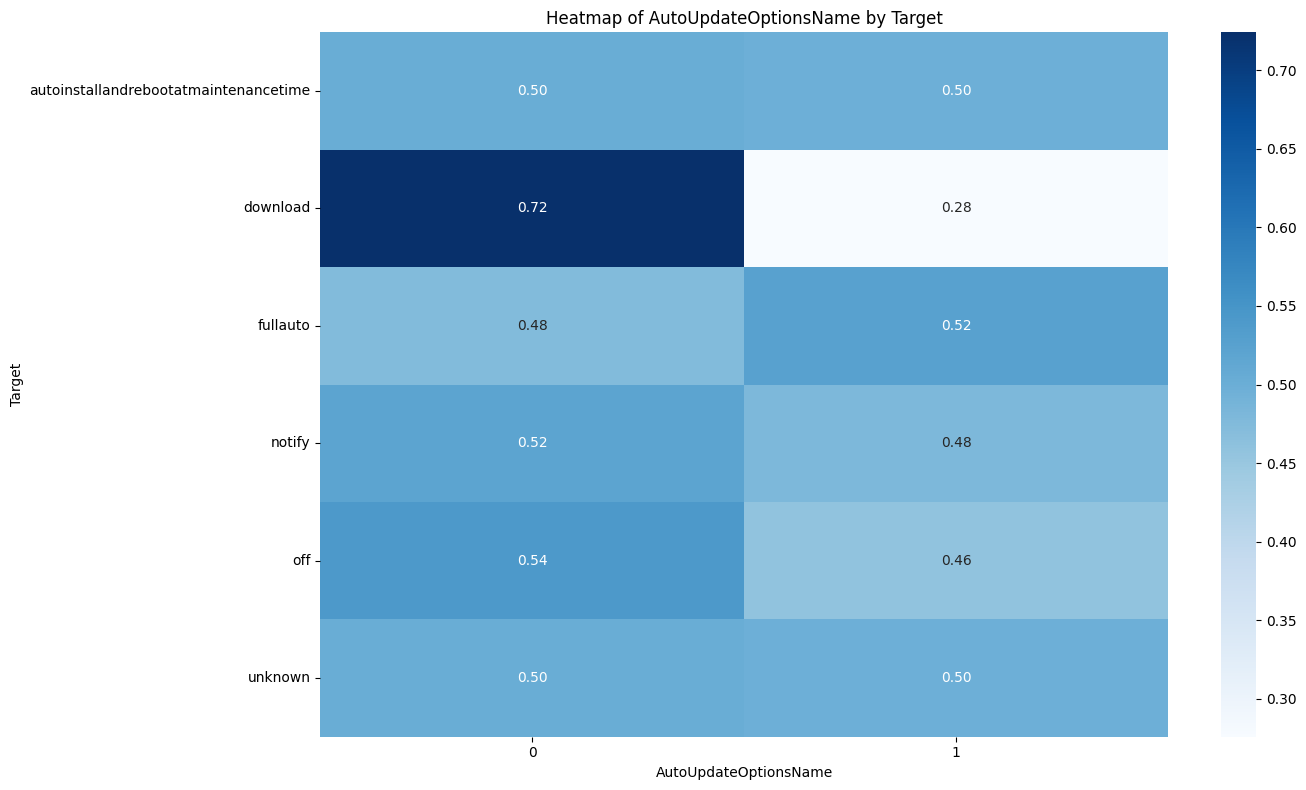

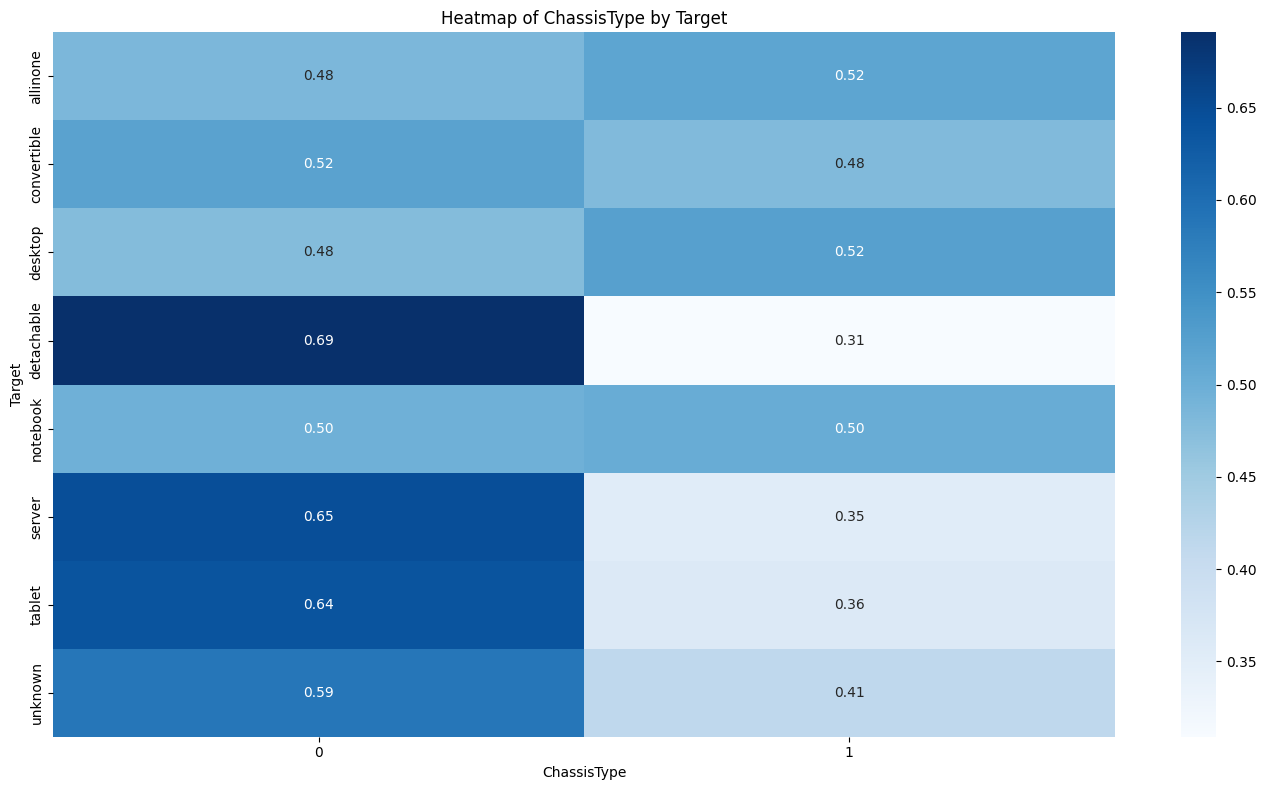

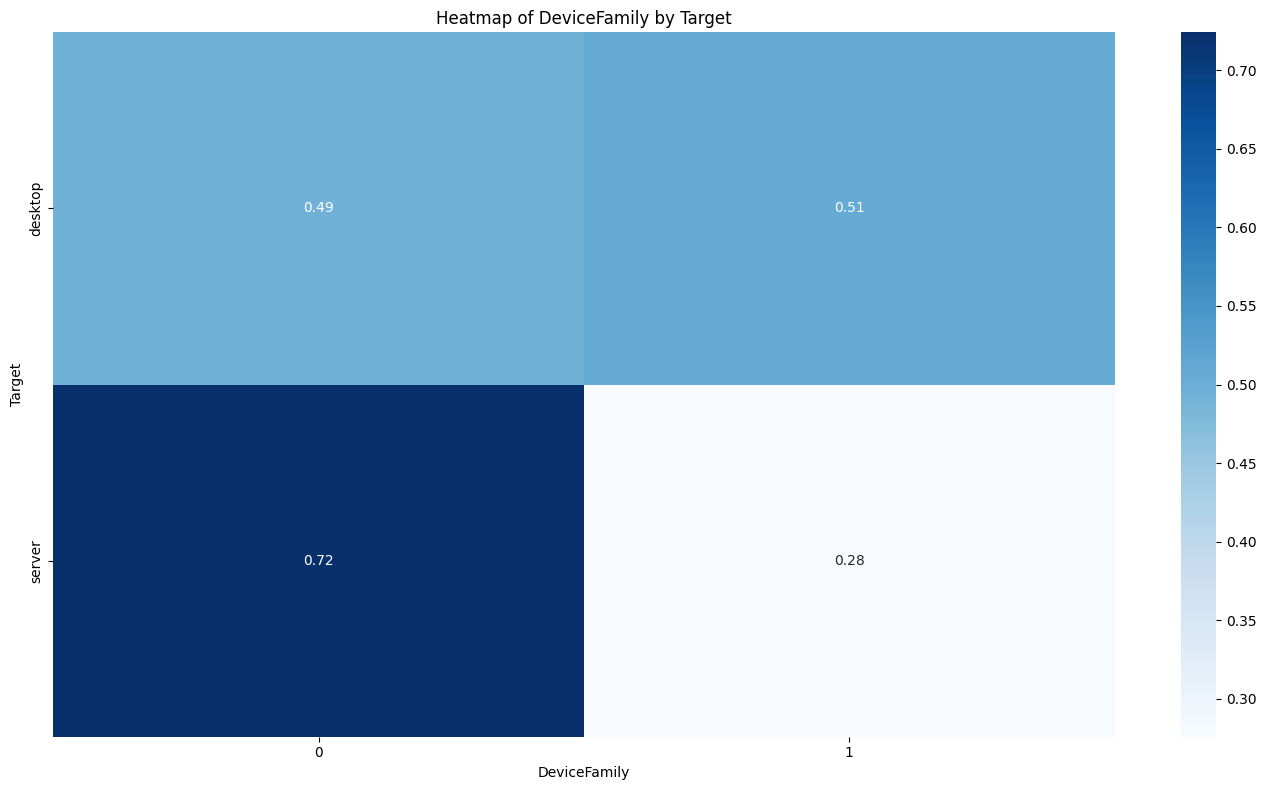

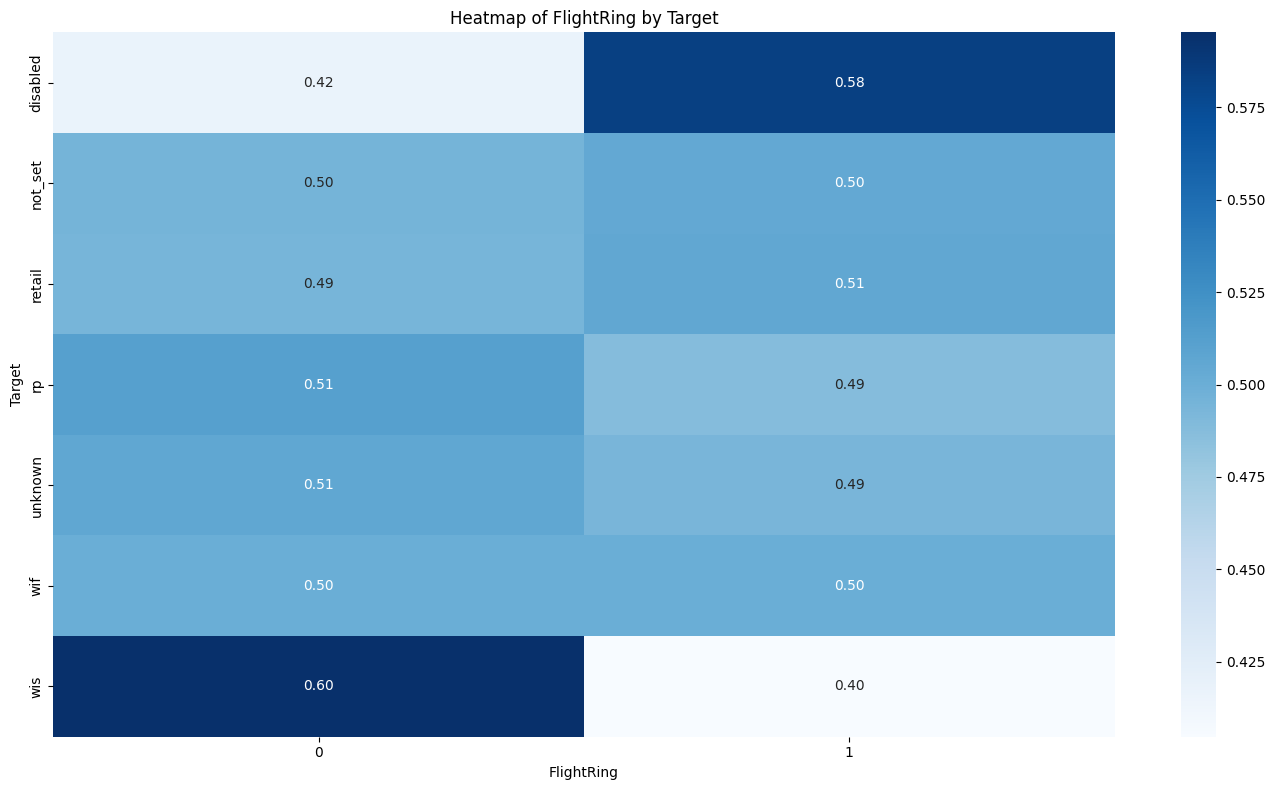

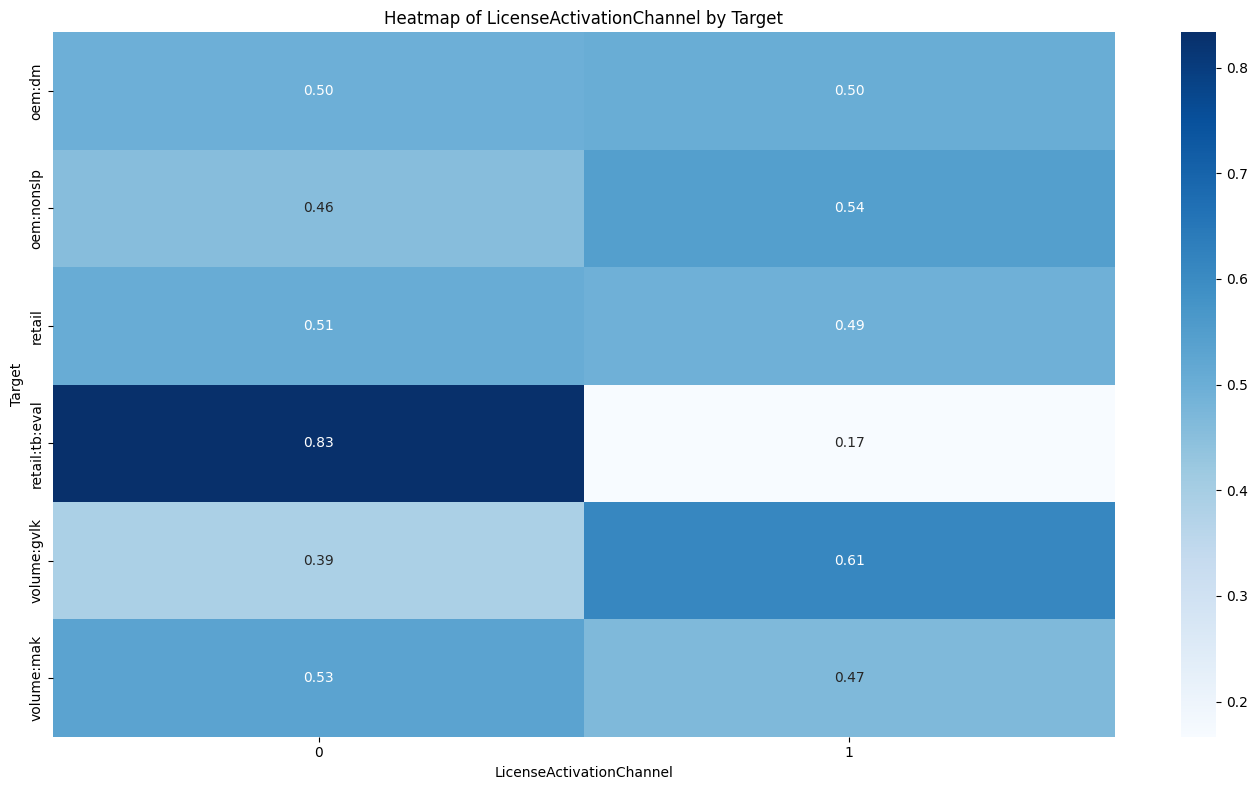

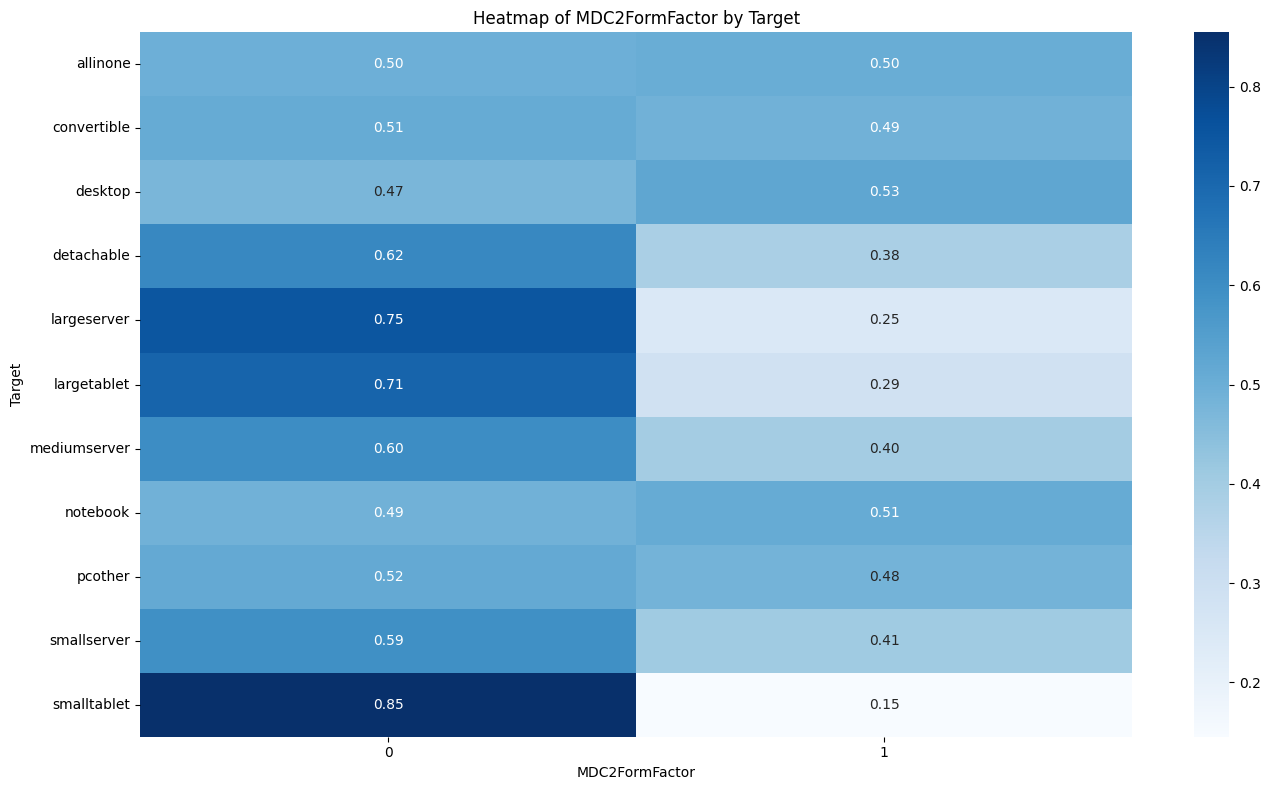

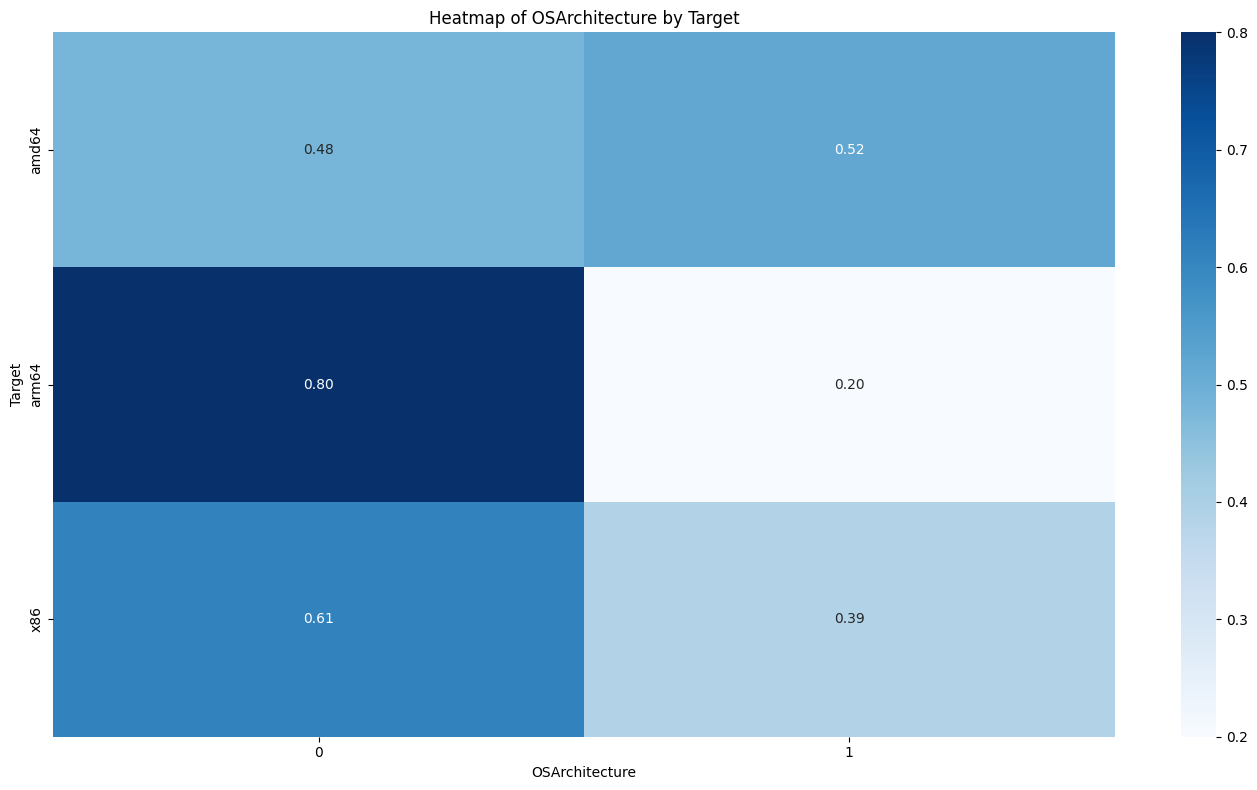

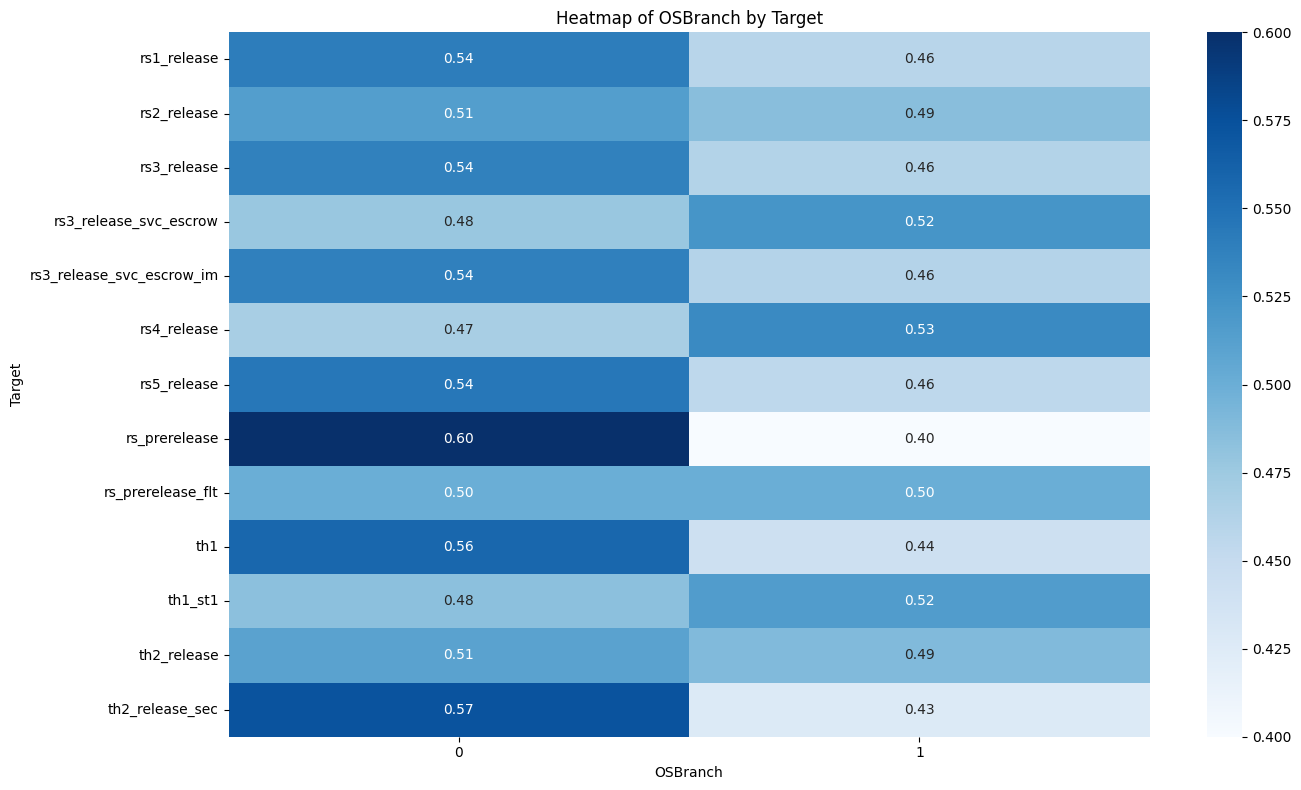

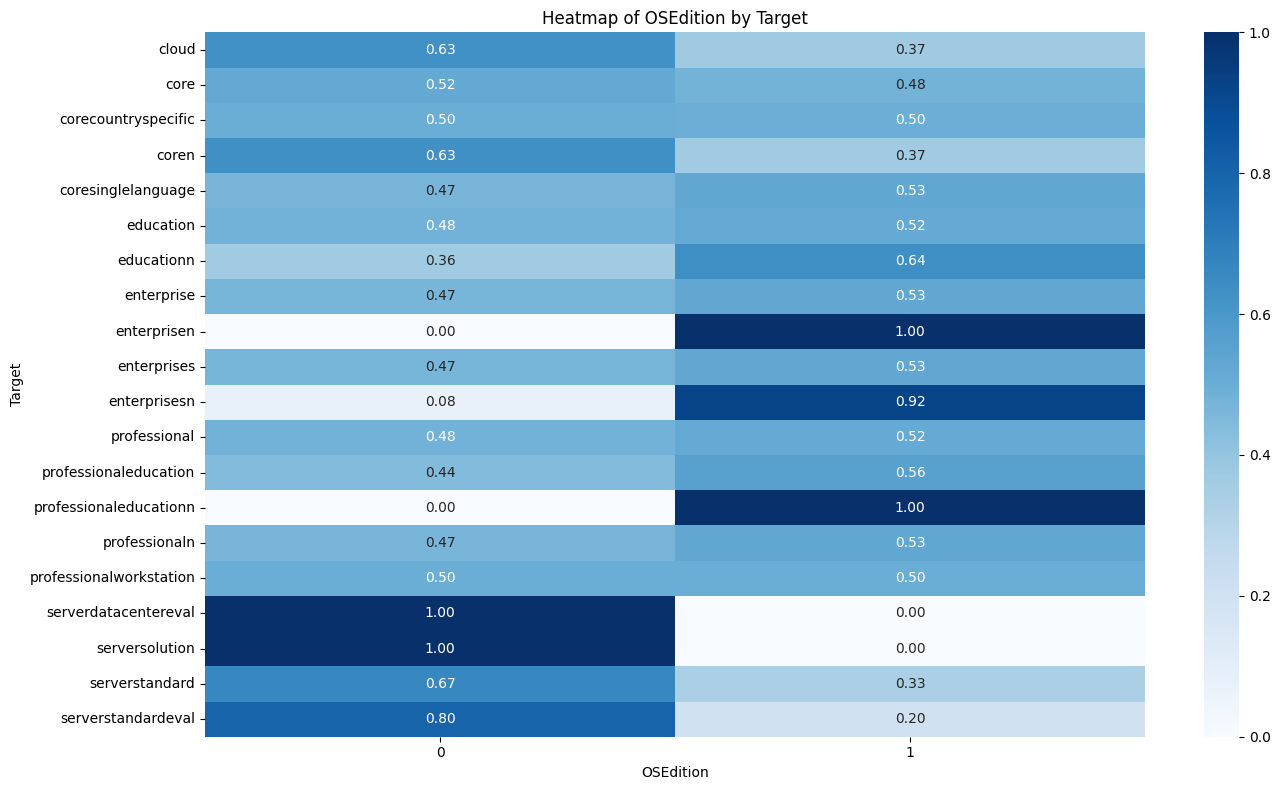

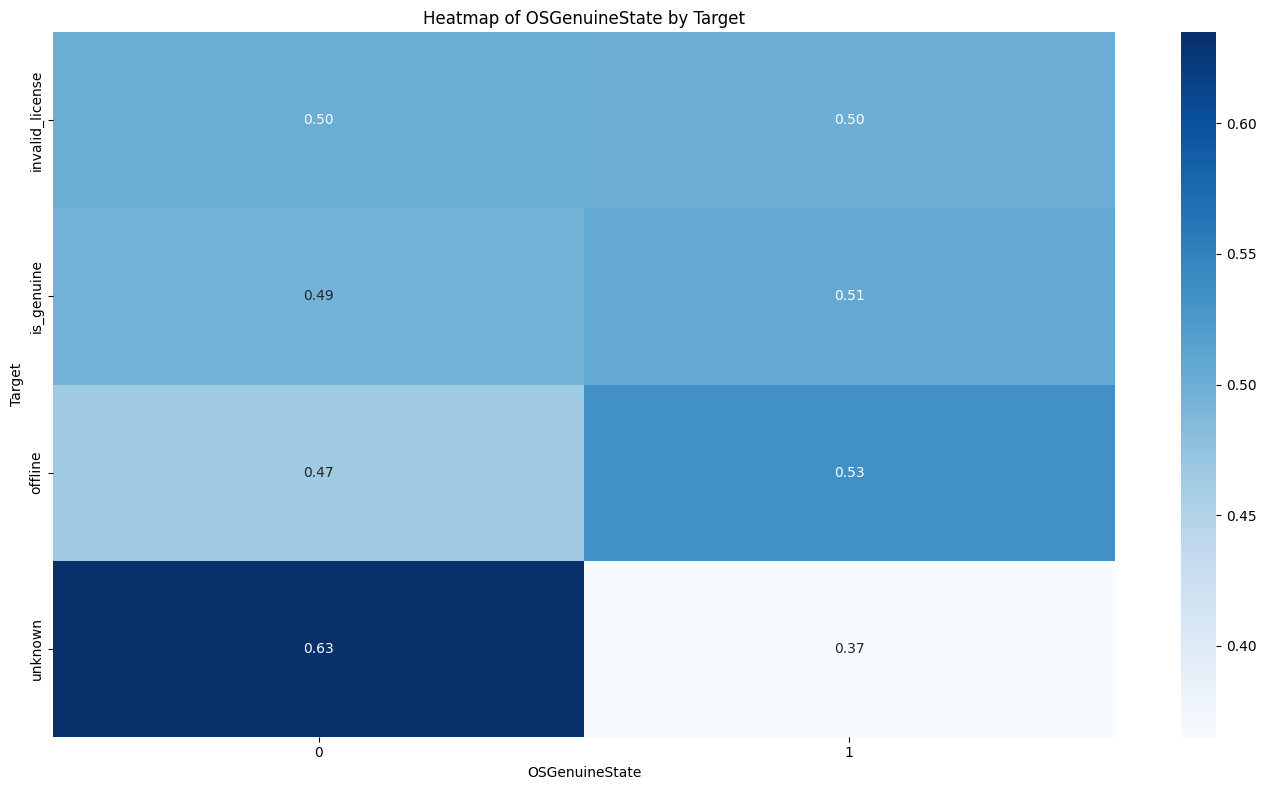

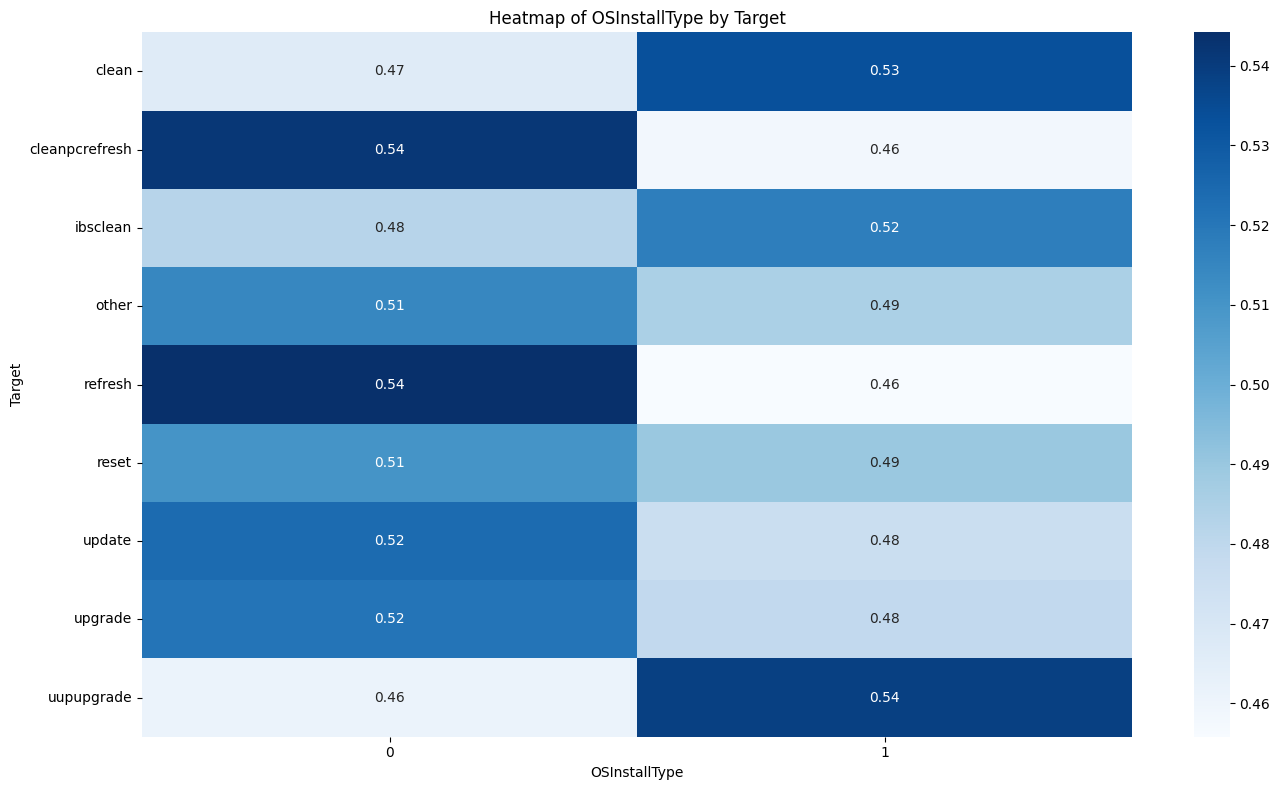

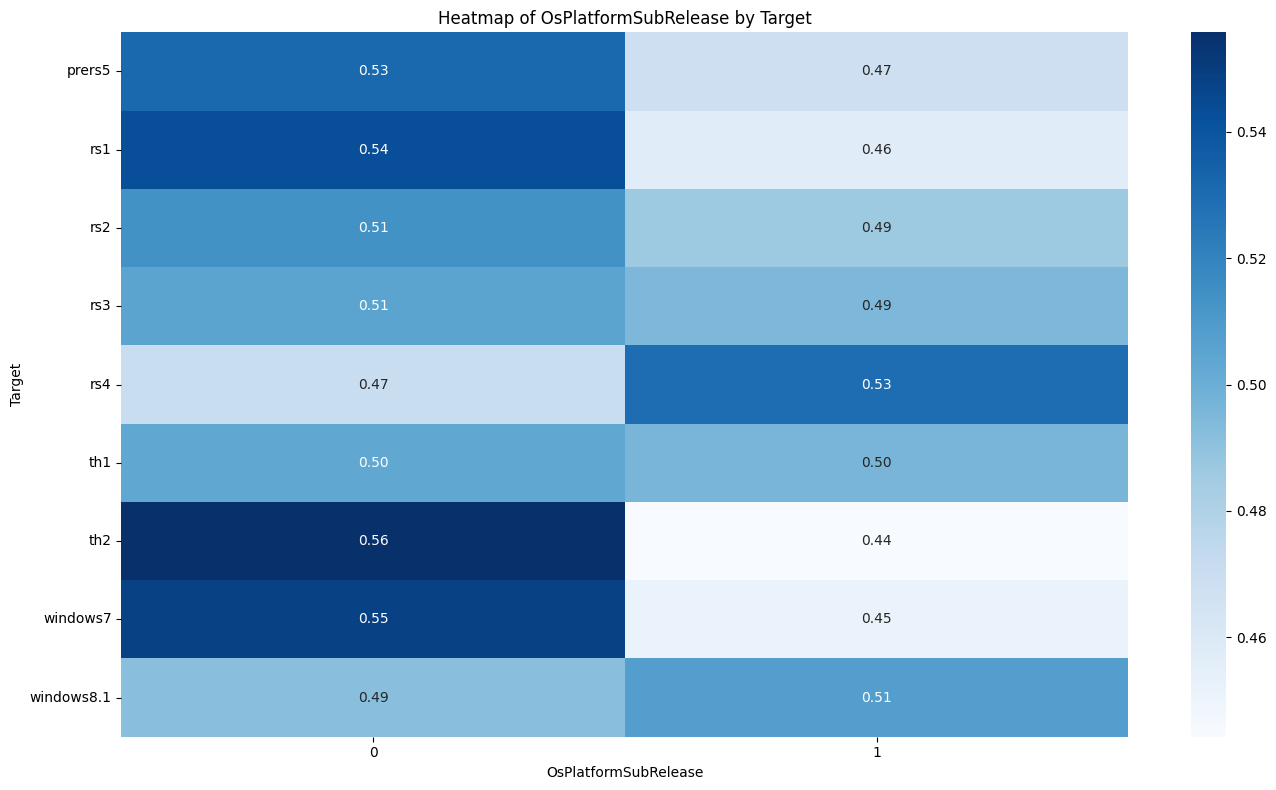

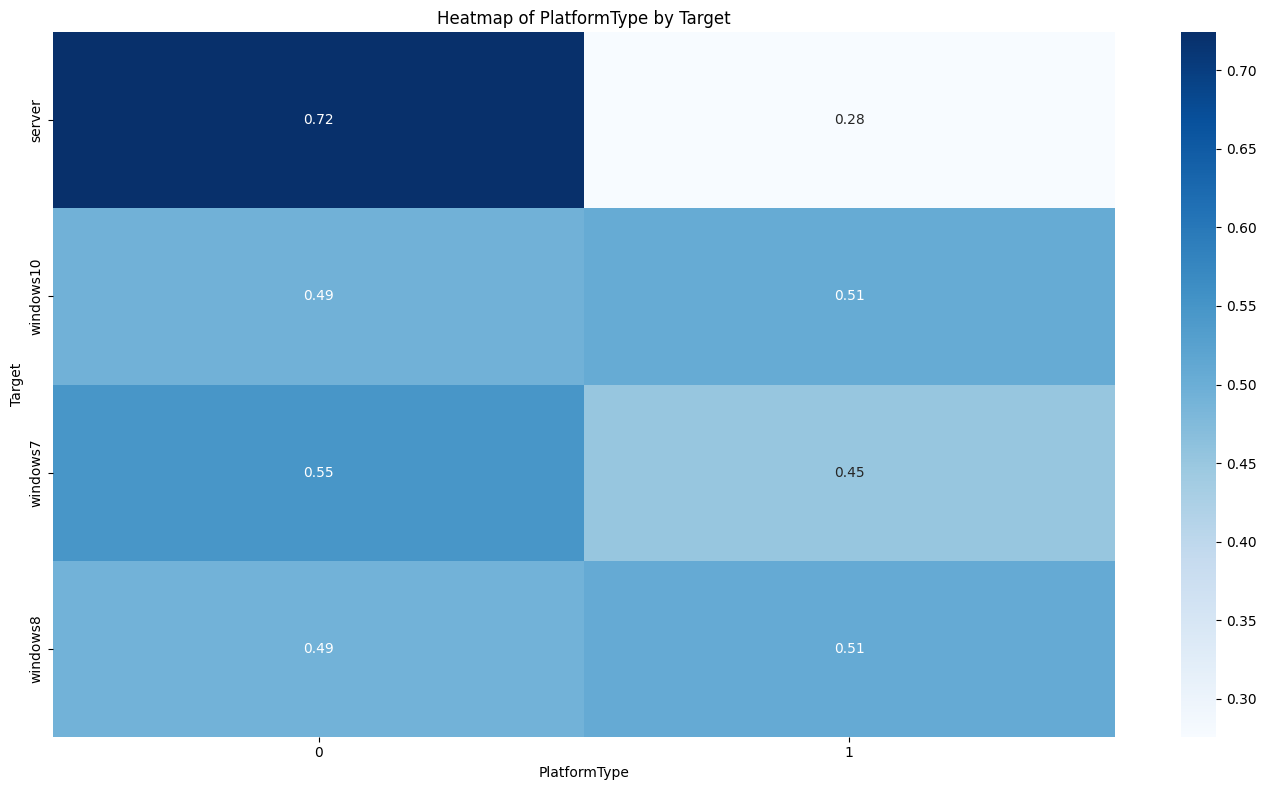

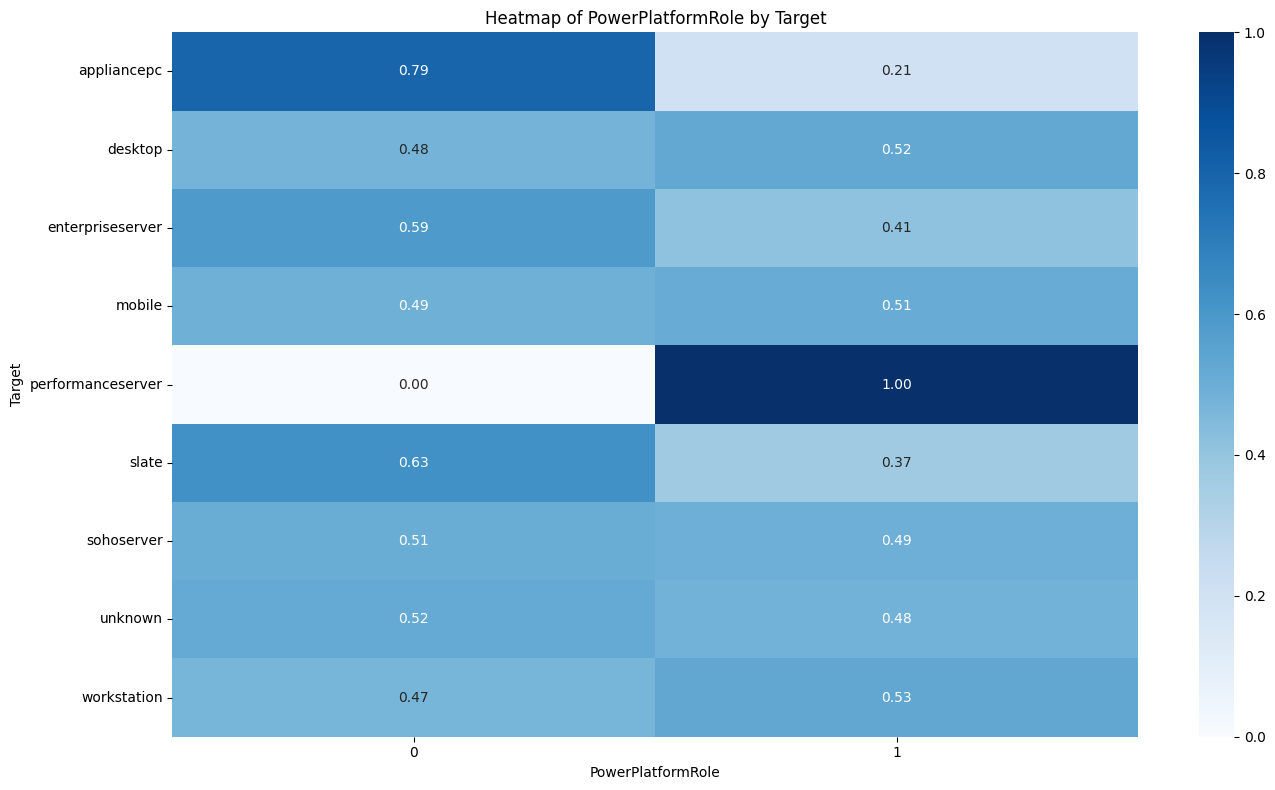

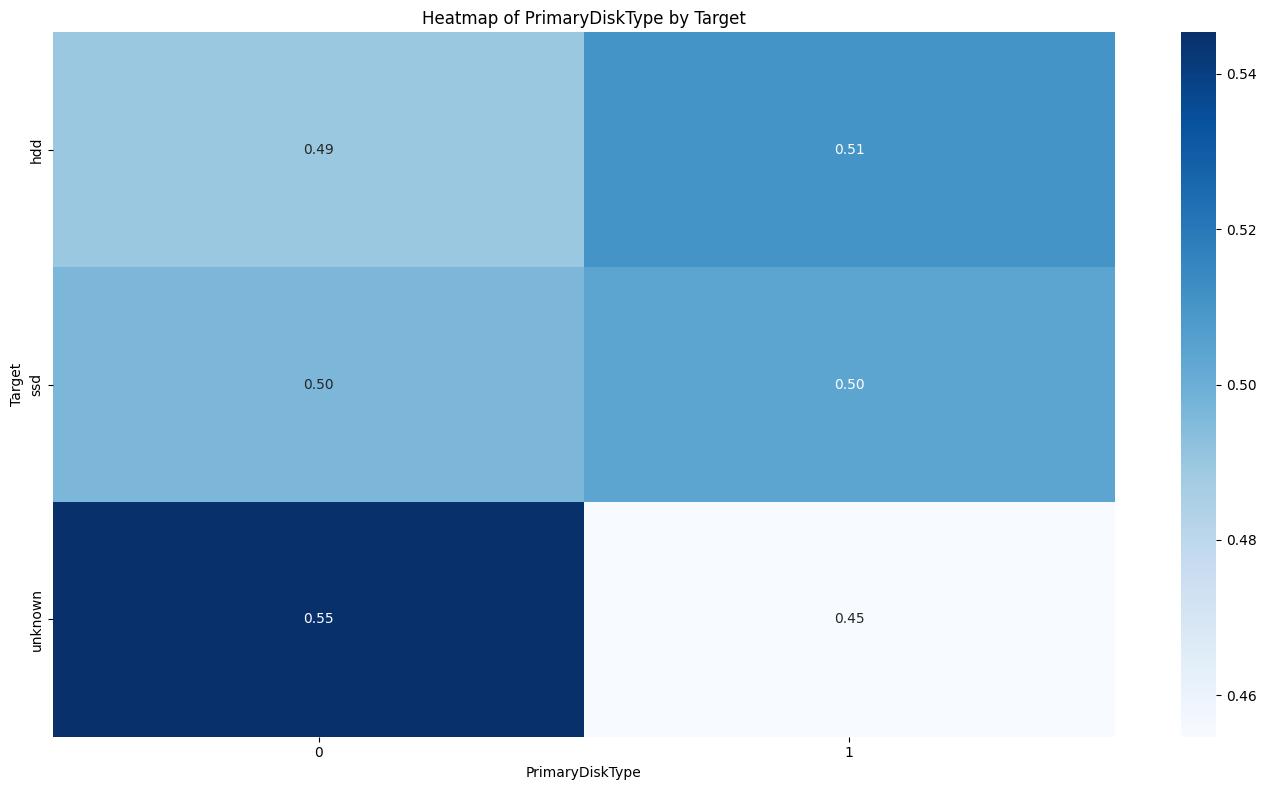

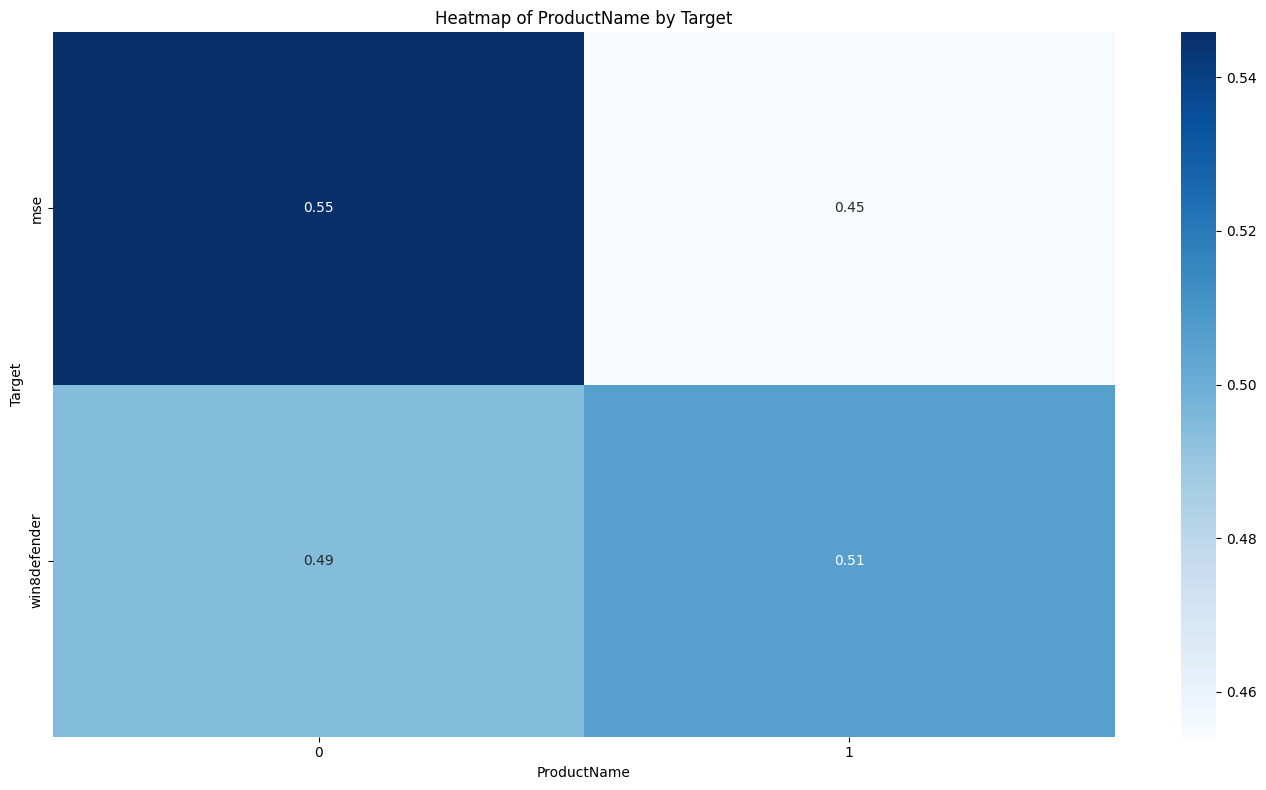

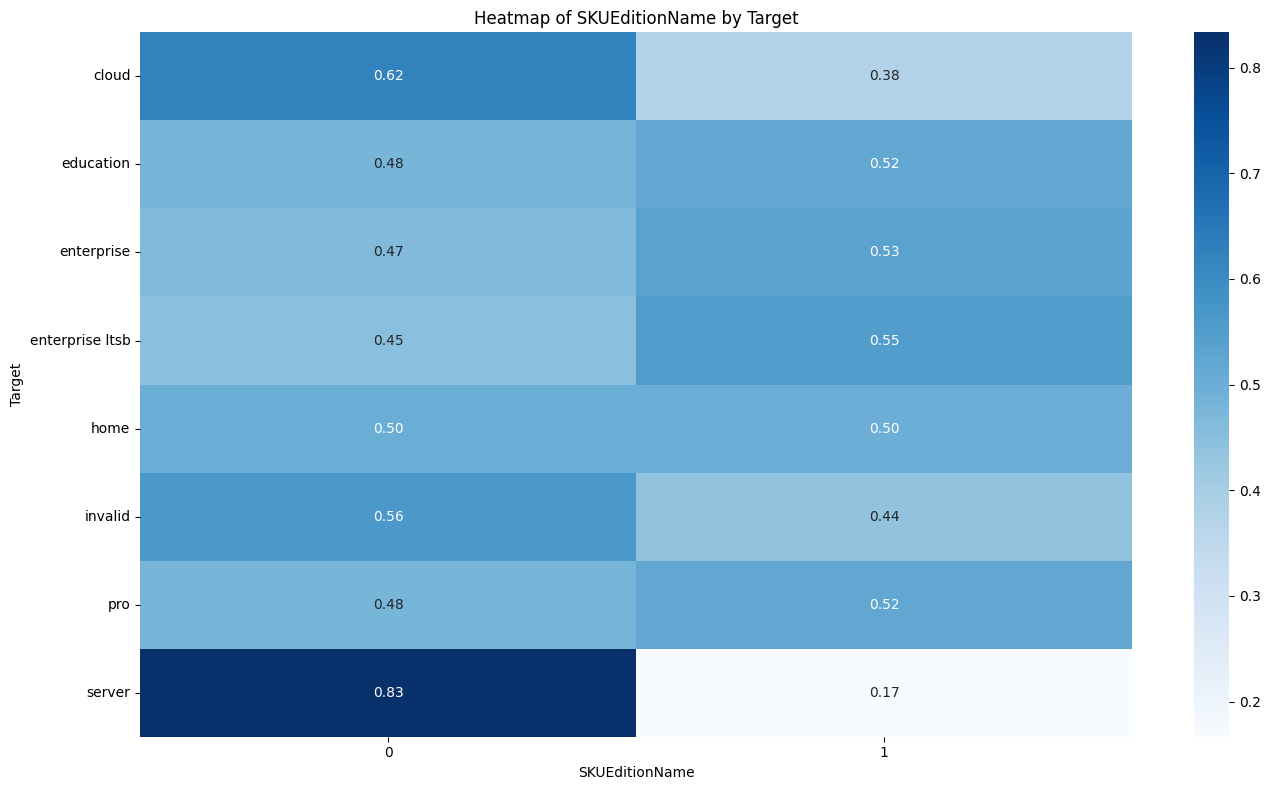

In [72]:
for feature in normal_categorical_features:
        crosstab = pd.crosstab(train_data[feature], train_data['target'], normalize='index')
        # crosstab = crosstab.head(30)
        plt.figure(figsize=(max(14, len(crosstab.columns)), 8))
        sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='.2f', cbar=True)
        plt.title(f'Heatmap of {feature} by Target')
        plt.xlabel(feature)
        plt.ylabel('Target')
        plt.tight_layout()
        plt.show()

## **Key Insights from Crosstab Analysis**  

- **Strong Predictors for `target=1`**:
  - `PowerPlatformRole`: `"PerformanceServer"` (100% `target=1`)  
  - `LicenseActivationChannel`: `"Volume:GVLK"` (61% `target=1`)  
  - `OSInstallType`: `"Upgrade"`, `"Clean"` (~52% `target=1`)  

- **Strong Predictors for `target=0`**:   
  - `OS Architecture`: `"arm64"` (80% `target=0`)  
  - `AutoUpdateOptionsName`: `"Download"` (72% `target=0`)  

- **Balanced Features (~50/50 split)**:  
  - `PrimaryDiskType`: `"hdd"` (51% `target=1`) vs. `"ssd"` (50% `target=1`)  
  - `OSBranch`: `"th1"`, `"th2"`, `"rs1"`  

### **Conclusion**  
**License Activation Channel, and Power Platform Role** are the most significant predictors.  
Other features like **OS Install Type** also show notable influence.


# **Preprocessing**

In [73]:
# Preprocessing for Numerical Features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

# Preprocessing for Binary Features
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Preprocessing for Categorical Features
categorical_transformer_onehot = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore',sparse=False))
])

categorical_transformer_ordinal = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Combine Preprocessors in a ColumnTransformer
preprocessor= ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('bin', binary_transformer, binary_features),
        ('cat_onehot', categorical_transformer_onehot, normal_categorical_features),
        ('cat_ordinal', categorical_transformer_ordinal, high_uniq_categorical_features)
    ]
)

# **Train-Validation Split**

In [74]:
print("Train Dataset Shape",train_data.shape)
print("Test Dataset Shape",test_data.shape)

Train Dataset Shape (99835, 67)
Test Dataset Shape (10000, 66)


In [75]:
X = train_data.drop(columns=["target"])
y = train_data["target"]
X_test = test_data[X.columns]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# **Reusable Functions**

In [76]:
def plot_confusion_matrices(models, X_train, y_train, X_val, y_val, preprocessor):
    results = {}
    fig, axes = plt.subplots(1, len(models), figsize=(len(models) * 4, 4))
    axes = np.atleast_1d(axes)

    for ax, (name, model) in zip(axes, models.items()):
        pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", model)]).fit(X_train, y_train)
        y_pred = pipeline.predict(X_val)
        results[name] = accuracy_score(y_val, y_pred)

        sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues", ax=ax)
        ax.set_title(name)
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")

        for p in ax.patches:
            ax.annotate(f"{p.get_height():.6f}", 
                        (p.get_x() + p.get_width() / 2, p.get_height() + 0.02),  
                        ha="center", va="bottom")

    plt.tight_layout()
    plt.show()
    return results

def print_classification_reports(models, X_train, y_train, X_val, y_val, preprocessor):
    for name, model in models.items():
        pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", model)]).fit(X_train, y_train)
        y_pred = pipeline.predict(X_val)
        print(f"{name}\n{classification_report(y_val, y_pred)}\n" + "-"*80)

def plot_accuracy_bar(results):
    results_series = pd.Series(results).sort_values(ascending=False)
    ax = results_series.plot(kind="bar", color=sns.color_palette("husl", len(results)), figsize=(6, 4), ylim=(0, 1))
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy")

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.6f}", 
                    (p.get_x() + p.get_width() / 2, p.get_height() + 0.02),  
                    ha="center", va="bottom")

    plt.show()

def optimize_model(model, param_grid, X_train, y_train, X_val, y_val, preprocessor):
    pipeline = Pipeline([("preprocessor", preprocessor), ("classifier", model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_val_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)

    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Validation Accuracy: {accuracy:.6f}")

    plt.figure(figsize=(5, 5))
    sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    return best_model

# **Determining Models**

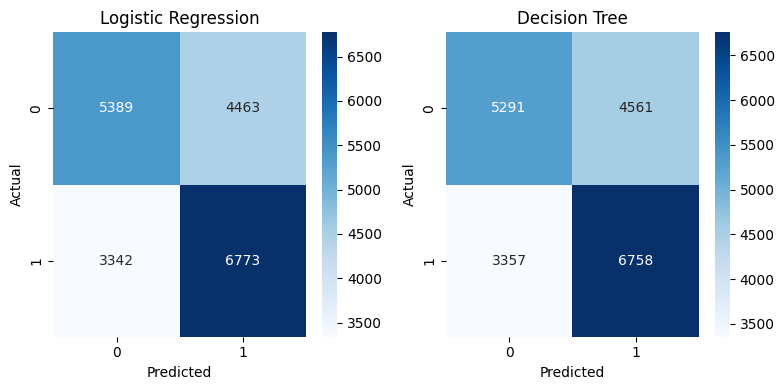

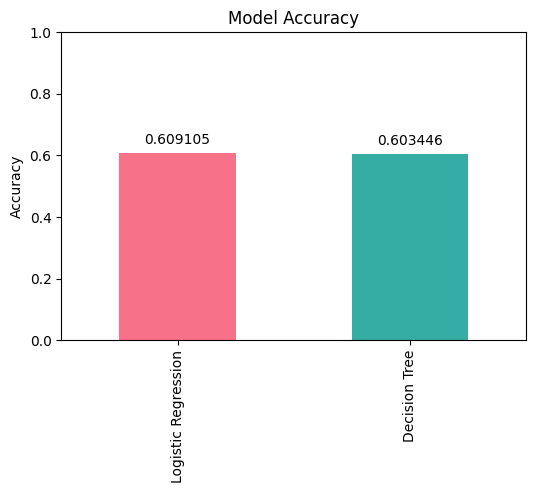

In [77]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(C=1.0, solver='liblinear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, random_state=42),
}

# Run confusion matrix plots
results = plot_confusion_matrices(models, X_train, y_train, X_val, y_val, preprocessor)

# Plot accuracy comparison
plot_accuracy_bar(results)

# results

## Model Comparison  

| Model                 | Accuracy  | Key Observations |
|-----------------------|----------|-----------------|
| **Logistic Regression** | **60.91%** | Best accuracy, assumes linearity. |
| **Decision Tree**       | **60.34%** | lower accuracy, captures complex patterns. |



# **Logistic Regression Model**

## Hyperparameters of Logistic Regression Model

In [78]:
# # Define model
# model = LogisticRegression(random_state=42)

# # Define hyperparameter grid
# param_grid = {
#     "classifier__solver": ["saga", "liblinear"],
#     "classifier__penalty": ["l1", "l2"],
#     "classifier__C": [0.5, 1, 10]
# }

# best_model = optimize_model(model, param_grid, X_train, y_train, X_val, y_val, preprocessor)

Best parameters: {'classifierC': 1, 'classifierpenalty': 'l1', 'classifier__solver': 'liblinear'}

Validation Accuracy: 0.609606

## Comparing Accuracy after Hyperparameter tunning

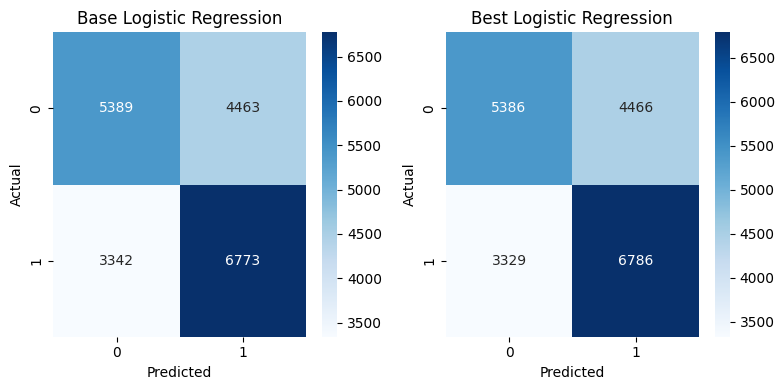

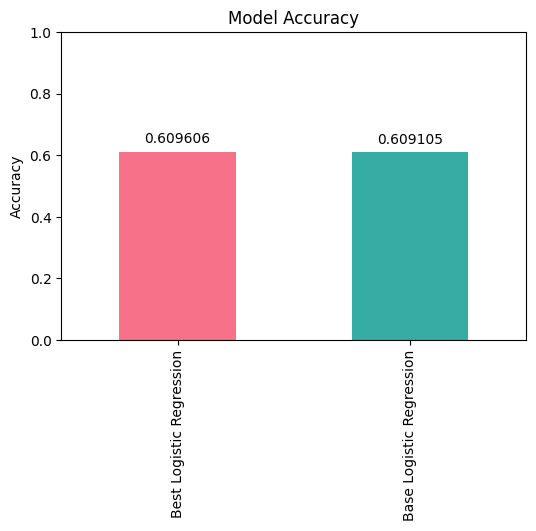

In [79]:
# Define models
models = {
    "Base Logistic Regression": LogisticRegression(C=1.0, solver='liblinear', random_state=42),
    "Best Logistic Regression": LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=42),
}

# Run confusion matrix plots
results = plot_confusion_matrices(models, X_train, y_train, X_val, y_val, preprocessor)

# Plot accuracy comparison
plot_accuracy_bar(results)

# results

Base Logistic Regression Accuracy: 0.609105

Best Logistic Regression Accuracy: 0.609606

# **Decision Tree Model**

## Hyperparameters of Decision Tree Model

In [80]:
# # Define model
# model = DecisionTreeClassifier(random_state=42)

# # Define hyperparameter grid
# param_grid = {
#     ''
#     "classifier__max_depth": [8, 9, 10],
#     "classifier__min_samples_split": [2, 3, 4],
#     "classifier__min_samples_leaf": [1, 2, 3],
# }

# best_model = optimize_model(model, param_grid, X_train, y_train, X_val, y_val, preprocessor)

Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 2}

Validation Accuracy: 0.604848

## Comparing Accuracy after Hyperparameter tunning

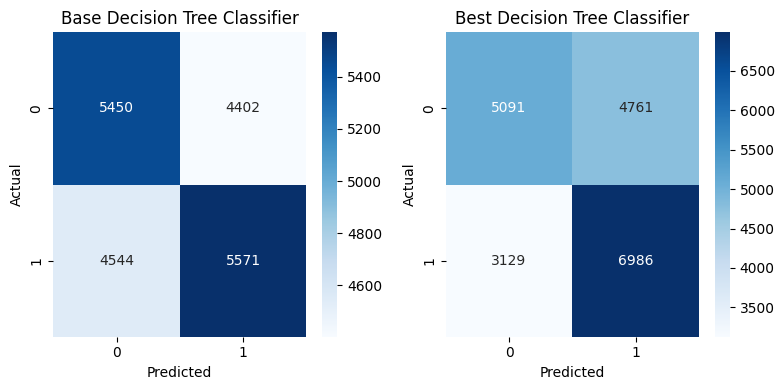

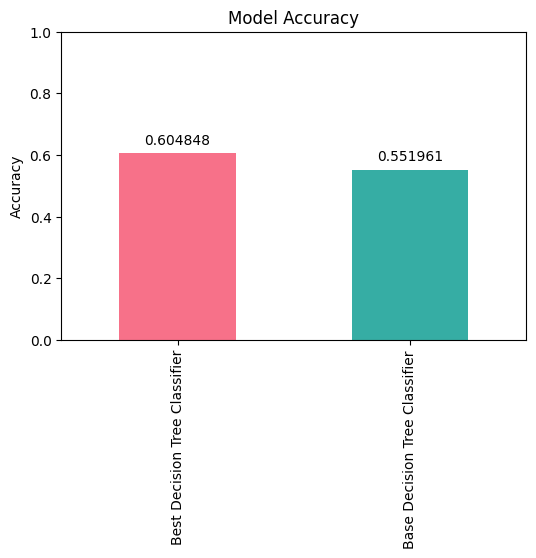

In [81]:
models = {
    "Base Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Best Decision Tree Classifier": DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=3, random_state=42),
}

# Run confusion matrix plots
results = plot_confusion_matrices(models, X_train, y_train, X_val, y_val, preprocessor)

# Plot accuracy comparison
plot_accuracy_bar(results)

# results

Base Decision Tree Classifier: 0.551960

Best Decision Tree Classifier: 0.604847

# **Boosting Based Models**

In [82]:
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

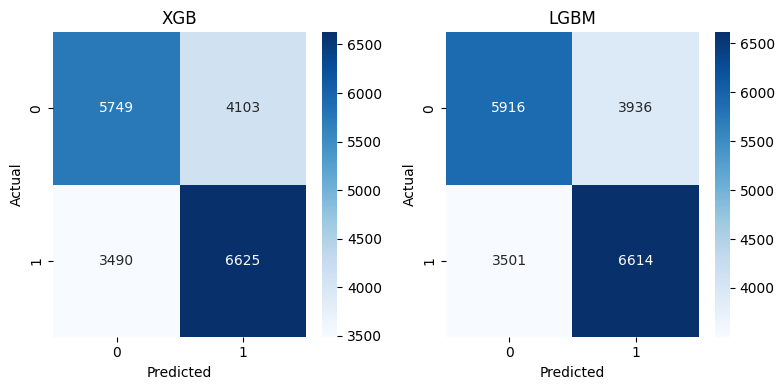

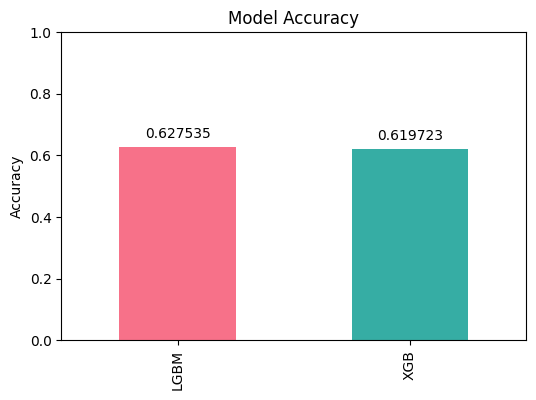

In [83]:
models = {
    "XGB": XGBClassifier(booster="gbtree", objective="binary:logistic", eval_metric="logloss", random_state=42),
    "LGBM": LGBMClassifier(boosting_type="gbdt", objective="binary", metric=["binary_logloss", "auc"], verbose=-1, random_state=42, scale_pos_weight=scale_pos_weight),
}

# Run confusion matrix plots
results = plot_confusion_matrices(models, X_train, y_train, X_val, y_val, preprocessor)

# Plot accuracy comparison
plot_accuracy_bar(results)

# results

## Model Comparison

| Model               | Accuracy  | Key Observations |
|---------------------|----------|-----------------|
| **XGBoost (XGB)**  | **61.97%** | Slightly better accuracy, handled missing values well but required more tuning. |
| **LightGBM (LGBM)** | **62.75%** | Best accuracy, fastest training, and effectively handled feature interactions. |


# **XGB Model**

## Hyperparameters for XGB Classifier

In [84]:
# # Define model
# model = XGBClassifier(booster="gbtree", objective="binary:logistic", eval_metric=["logloss", "auc"], verbose=-1, random_state=42,scale_pos_weight=scale_pos_weight)

# param_grid = {
#     "classifier__n_estimators": [1000,1200],
#     "classifier__learning_rate": [0.05,1],
#     "classifier__max_depth": [7,9,11],
# }

# best_model = optimize_model(model, param_grid, X_train, y_train, X_val, y_val, preprocessor)

Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 7, 'classifier__n_estimators': 1000}

Validation Accuracy: 0.627235

## Comparing Accuracy after Hyperparameter tunning

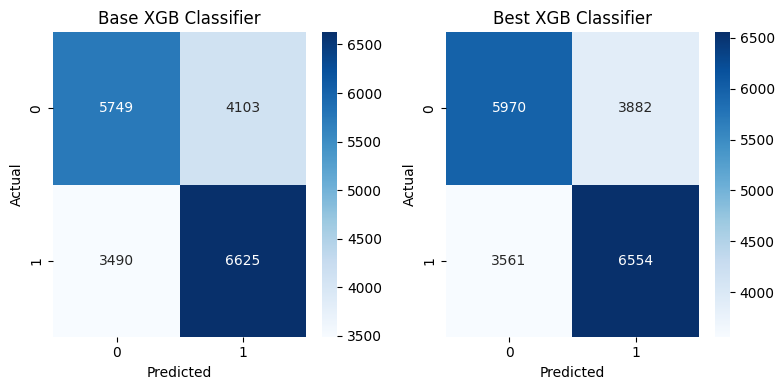

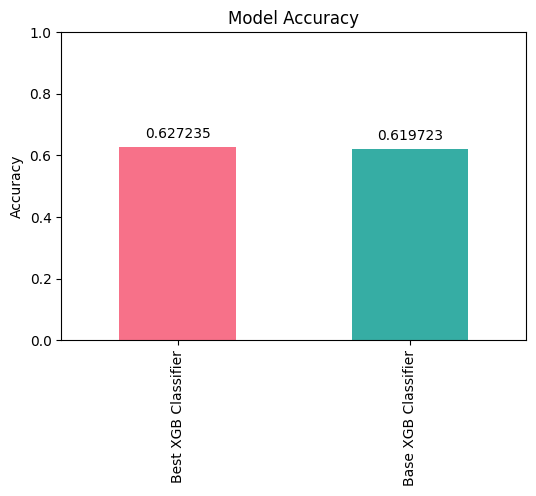

In [85]:
models = {
    "Base XGB Classifier": XGBClassifier(booster="gbtree", objective="binary:logistic", eval_metric="logloss", random_state=42),
    "Best XGB Classifier": XGBClassifier(booster="gbtree", objective="binary:logistic", eval_metric=["logloss"], n_estimators=1000, learning_rate=0.05, max_depth=7, verbose=-1,random_state=42,scale_pos_weight=scale_pos_weight),
}

# Run confusion matrix plots
results = plot_confusion_matrices(models, X_train, y_train, X_val, y_val, preprocessor)

# Plot accuracy comparison
plot_accuracy_bar(results)

# results

Base XGB Classifier: 0.619722

Best XGB Classifier: 0.627234

# **LBGM Model**

## Hyperparameters for LGBM Classifier

In [86]:
# # Define model
# model = LGBMClassifier(boosting_type="gbdt", objective="binary", metric=["binary_logloss", "auc"], verbose=-1, random_state=42,scale_pos_weight=scale_pos_weight)

# param_grid = {
#     "classifier__n_estimators": [1000,1200],
#     "classifier__learning_rate": [0.05,1],
#     "classifier__max_depth": [7,9,11],
# }

# best_model = optimize_model(model, param_grid, X_train, y_train, X_val, y_val, preprocessor)

Best Parameters: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 7, 'classifier__n_estimators': 1000}

Validation Accuracy: 0.629288

## Comparing Accuracy after Hyperparameter tunning

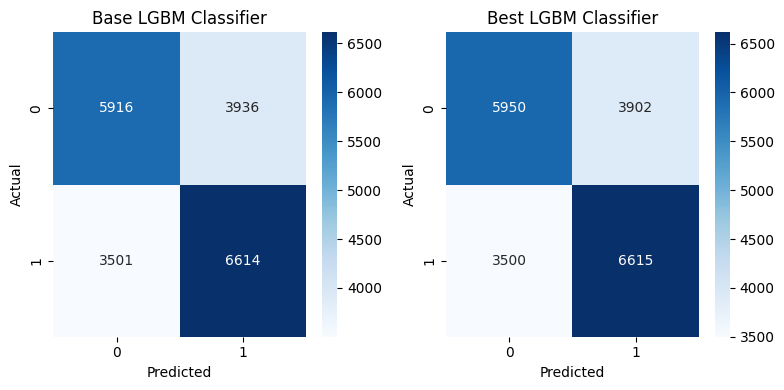

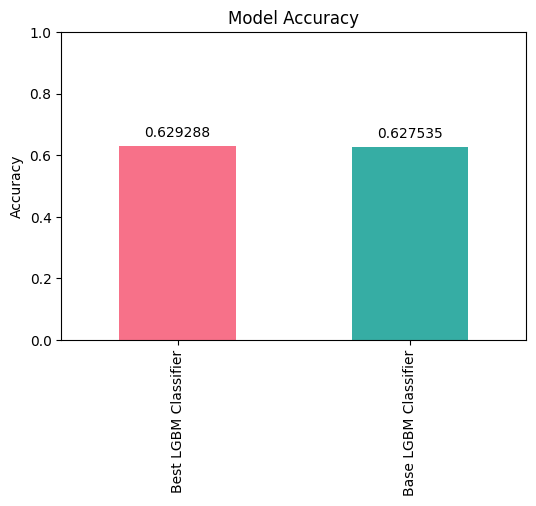

In [87]:
# Define models
models = {
    "Base LGBM Classifier": LGBMClassifier(boosting_type="gbdt", objective="binary", metric=["binary_logloss", "auc"], verbose=-1, random_state=42, scale_pos_weight=scale_pos_weight),
    "Best LGBM Classifier": LGBMClassifier(boosting_type="gbdt", objective="binary", metric=["binary_logloss", "auc"],n_estimators=1000, learning_rate=0.05, max_depth=7, verbose=-1,random_state=42,scale_pos_weight=scale_pos_weight),
}

# Run confusion matrix plots
results = plot_confusion_matrices(models, X_train, y_train, X_val, y_val, preprocessor)

# Plot accuracy comparison
plot_accuracy_bar(results)

# results

Base LGBM Classifier: 0.627535

Best LGBM Classifier: 0.629288

## Feature Importance for LGBM Classifier

In [88]:
# Define the LightGBM model
lgm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ('classifier', LGBMClassifier(boosting_type="gbdt", objective="binary", metric=["binary_logloss", "auc"],n_estimators=1000, learning_rate=0.05, max_depth=7, verbose=-1,random_state=42,scale_pos_weight=scale_pos_weight))
])

In [89]:
# Fit the pipeline
lgm_pipeline.fit(X_train, y_train)

# Get trained model
model = lgm_pipeline.named_steps["classifier"]

# Get feature importances
importances = model.feature_importances_

# Get feature names from the preprocessor
preprocessor = lgm_pipeline.named_steps["preprocessor"]

# Extract transformed feature names
from sklearn.compose import ColumnTransformer

if isinstance(preprocessor, ColumnTransformer):
    feature_names = []
    for name, transformer, cols in preprocessor.transformers_:
        if transformer == "passthrough":
            feature_names.extend(cols)  # Keep original names
        elif hasattr(transformer, "get_feature_names_out"):  
            feature_names.extend(transformer.get_feature_names_out(cols))
        else:
            feature_names.extend(cols)  # Fallback if no method
else:
    feature_names = X_train.columns  # Directly use column names if no transformation

# Convert feature names to NumPy array
feature_names = np.array(feature_names)

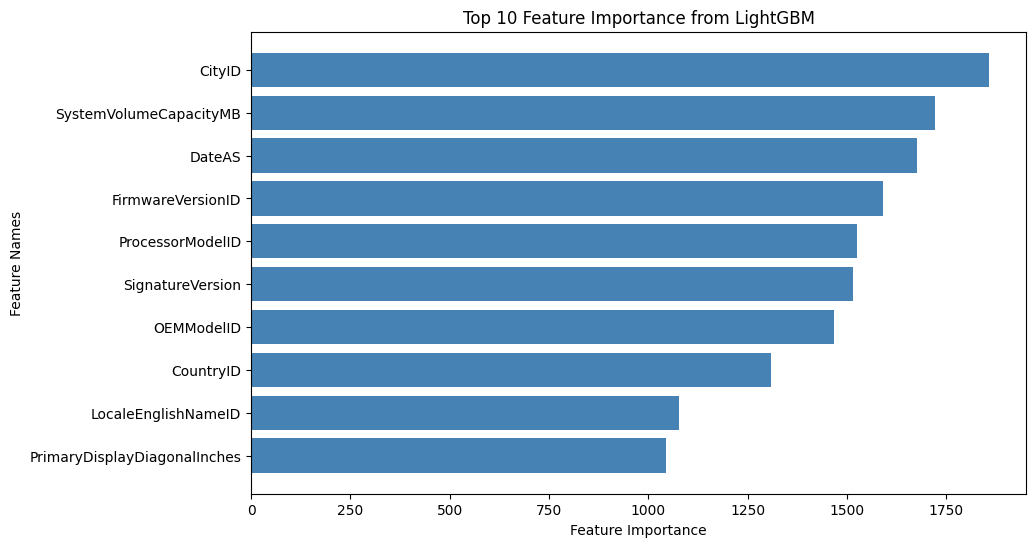

In [90]:
# Sort by importance (descending)
indices = np.argsort(importances)[::-1]

# Select top 10 features
top_n = 10
top_indices = indices[:top_n]

# Plot top 15 feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[top_indices], align="center", color="steelblue")
plt.yticks(range(top_n), feature_names[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Names")
plt.title("Top 10 Feature Importance from LightGBM")
plt.gca().invert_yaxis()
plt.show()

## Feature Selection for LGBM Classifier

In [91]:
# # Define the pipeline with SelectKBest and LightGBM
# pipeline = Pipeline(steps=[
#     ("preprocessor", preprocessor),
#     ('feature_selection', SelectKBest(score_func=mutual_info_classif)),  # k will be tuned
#     ('classifier', LGBMClassifier(boosting_type="gbdt", objective="binary", metric=["binary_logloss", "auc"],n_estimators=1000, learning_rate=0.05, max_depth=7, verbose=-1,random_state=42,scale_pos_weight=scale_pos_weight))
# ])

# # Define the hyperparameter grid for k (number of selected features)
# param_grid = {
#     'feature_selection__k': [10,30,50,'all'],  # Try different values for k
# }

# # Perform Grid Search with cross-validation
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
# grid_search.fit(X_train, y_train)

# # Get the best value for k
# best_k = grid_search.best_params_['feature_selection__k']
# best_score = grid_search.best_score_

# print(f"\nBest k: {best_k}, Best CV Accuracy: {best_score:.6f}")

# # Train the final model with the best k
# final_model = grid_search.best_estimator_
# final_model.fit(X_train, y_train)

# # Make predictions on the validation set
# y_val_pred = final_model.predict(X_val)
# accuracy = accuracy_score(y_val, y_val_pred)
# print(f"\nFinal Model Accuracy: {accuracy:.6f}")

# # Test set predictions
# lgm_test_predictions = final_model.predict(X_test)
# print("Test Set Predictions Count:", Counter(lgm_test_predictions))

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best k: all, Best CV Accuracy: 0.629288

Final Model Accuracy: 0.629288

Test Set Predictions Count: Counter({1: 5388, 0: 4612})

# **Why LightGBM is the Best Model**

1. **Best Accuracy on This Dataset** – Achieved **62.93%**, outperforming all models.  
2. **Faster Training** – Required less computational time compared to Other Boosting Model (like XGB).  
3. **Better Feature Handling** – Leaf-wise growth captured important patterns better than level-wise methods.  
4. **Dealt Well with Imbalanced Classes** – Improved decision boundaries in minority class predictions.  
5. **Scalable for Large Data** – Processed the dataset efficiently without high memory usage.  

In [92]:
# Define the LightGBM model
lgm_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ('classifier', LGBMClassifier(boosting_type="gbdt", objective="binary", metric=["binary_logloss", "auc"],n_estimators=1000, learning_rate=0.05, max_depth=7, verbose=-1,random_state=42,scale_pos_weight=scale_pos_weight))
])


# Perform cross-validation
cv_scores = cross_val_score(lgm_pipeline, X_train, y_train, cv=5, scoring='accuracy')

print("\nCross-validation scores:", cv_scores)
print(f"Mean CV score: {cv_scores.mean():.6f} (+/- {cv_scores.std() * 2:.6f})\n")

# Train the model
lgm_pipeline.fit(X_train, y_train)


Cross-validation scores: [0.62282459 0.62226117 0.6303368  0.62924936 0.62993802]
Mean CV score: 0.626922 (+/- 0.007194)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AntivirusConfigID',
                                                   'AppVersion', 'CityID',
                                                   'CountryID', 'EngineVersion',
                                                   'FirmwareManufacturerID',
                                                   'FirmwareVersionID',
                                                   'GeoRegionID', 'IEVersionID',
                                                   'InternalBatteryNumberOfCharges',
                                                   'Loc...
                                                   'SKUEditionName']),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['DateAS', 'DateOS',
                                                   'OSBuildLab'])])),
                ('classifier',
                 LGBMClassifier(learning_rate=0.05, max_depth=7,
                                metric=['binary_logloss', 'auc'],
                                n_estimators=1000, objective='binary',
                                random_state=42,
                                scale_pos_weight=0.980460226145606,
                                verbose=-1))])

In [93]:
# Make predictions on the validation set
y_val_pred = lgm_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nLightGBM Accuracy: {accuracy:.6f}")

# Test set predictions
lgm_test_predictions = lgm_pipeline.predict(X_test)
print("LightGBM Test Set Predictions Count:", Counter(lgm_test_predictions))


LightGBM Accuracy: 0.629288
LightGBM Test Set Predictions Count: Counter({1: 5388, 0: 4612})


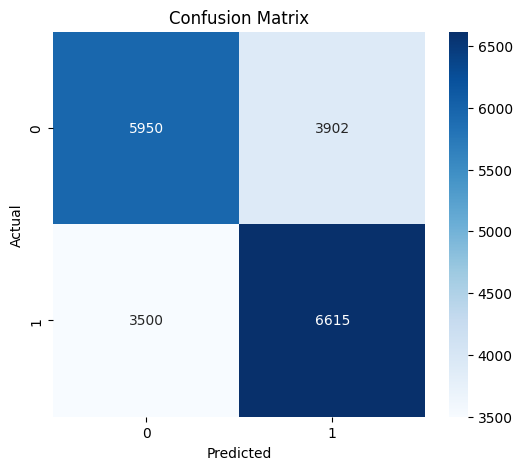

In [94]:
# Compute confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Metrices

In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.63      0.60      0.62      9852
           1       0.63      0.65      0.64     10115

    accuracy                           0.63     19967
   macro avg       0.63      0.63      0.63     19967
weighted avg       0.63      0.63      0.63     19967



## **Key Insights**
- **Overall accuracy is 63%**, indicating moderate performance.  
- **Recall for class 1 (0.65) is higher than class 0 (0.60)**, meaning the model identifies positive cases slightly better.  
- **Precision is balanced (0.63 for both classes)**, showing no extreme bias.  

In [96]:
submission = pd.DataFrame({
    "id": range(0,test_data.shape[0]),
    "target": lgm_test_predictions
})

submission.to_csv("sample_submission.csv", index=False)